### **Project Methodology**

For the purpose of this assignment, our central objective is to conduct a thorough examination of response time variations associated with diverse tokenization and detokenization techniques implemented across various language models. Our approach is multifaceted, encompassing comparisons of tokenization techniques, the utilization of both batched and unbatched data, and evaluations across distinct corpora. Additionally, we broaden our scope beyond the Hugging Face libraries by incorporating an external library called Spacy into our research. It is important to recognize that tokenization holds an important part in natural language processing, enabling the efficient manipulation of textual data.

The initial phase of our project involves an extensive exploration of various tokenization types, such as Byte-Pair Encoding (BPE), WordPiece, Unigram, and SentencePiece, coupled with a comprehensive understanding of the underlying necessity of tokenization. Subsequently, we narrow our focus to language models employing these distinct tokenization methods, all of which are readily accessible within the Hugging Face libraries. To ensure precision in recording response times, we utilized Python's time function to measure the execution durations of both tokenization and detokenization processes. In addition, we introduced an external library, Spacy, into our research. This additional tool permits an exploration of alternative approaches to tokenization and detokenization, facilitating a side-by-side evaluation of Spacy's performance alongside the models we have chosen from the Hugging Face libraries.

Furthermore, we delve into the complexities of batched and unbatched data. Batched data refers to the grouping of text for simultaneous processing, while unbatched data is processed individually. We carefully explored the nuances between these two data types, analyzing the time differentials for the tokenization and detokenization of each token. To Ensure meaningful experimentation, we carefully select two distinct corpora for analysis. We took into account the corpus size, recognizing that larger corpora tend to result in extended processing times. These corpora are drawn from Hugging Face's dataset repository. To streamline our research, we establish a flexible framework that seamlessly integrates various language models, allowing us to plug and play the models of our choice thus enabling us to assess timing disparities effectively.

We utilize a range of tools, with a primary reliance on Python, the Hugging Face libraries, and Google Colab for code execution for our analysis. These tools provide a robust research environment, enabling the efficient conduct of extensive experiments. To ensure fairness and accuracy in our testing, we adhere to a strict guidelines to ensure fairness. Each language model undergoes an identical process, encompassing both batched and unbatched data, for both tokenization and detokenization. This approach guarantees consistent and precise measurement of processes and timings across all models.

In the analysis phase, we meticulously studied the timing data collected throughout our research to achieve a comprehensive understanding of response times linked to various tokenization and detokenization techniques. Our objective is to identify factors influencing processing times, determine the most efficient tokenization method, and ascertain whether batched or unbatched data processing yields better outcomes.
Furthermore, we employ data visualization techniques to effectively present our findings. Through the creation of informative charts and graphs, we are able to study and analyse disparities in response times between different tokenization methods and data processing approaches. These visual aids helps us in our research and revealing key insights. The analysis we conducted aims to shed light on the nuances of response times in tokenization and detokenization.





# `Project Dependencies`

In [50]:
%pip install -U pip setuptools wheel
%pip install -U spacy
!python -m spacy download en_core_web_sm
!python -m spacy download zh_core_web_sm
!python -m spacy download es_core_news_sm
%pip install transformers
%pip install sentencepiece
%pip install datasets
!pip install gdown

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     --------------------------------------- 12.8/12.8 MB 40.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     --------------------------------------- 48.5/48.5 MB 12.8 MB/s eta 0:00:00
  Obtaining dependency information for spacy-pkuseg<0.1.0,>=0.0.27 from https://files.pythonhosted.org/packages/4a/70/4a2eb0e61af7030aa3c686fa318462c7268ada3409486412743fee016b48/spacy_pkuseg-0.0.33-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 2.4/2.4 MB 19.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('zh_core_web_sm')
     ---------------------------------------- 12.9/12.9 MB 8.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
Note: you may n

# `Project Code`

Updated Project Code With detokenisation

In [37]:
from transformers import AutoTokenizer
from datasets import load_dataset
import time

# byte_pair_tokenization = ["openai-gpt", "gpt2", "NousResearch/Llama-2-13b-hf"]
# unigram_tokenization = ["google/bigbird-roberta-base", "facebook/mbart-large-50-many-to-many-mmt" , "albert-base-v2" , "xlnet-base-cased"]
# wordpiece_tokenization = ['distilbert-base-uncased','google/mobilebert-uncased','funnel-transformer/small-base','sentence-transformers/all-mpnet-base-v2']
# sentencepiece_tokenization = ["google/flan-t5-base"]

#corpus = ["I have a new GPU!", "I wonder how fast the model will train on this.","Hello there"]

dataset = load_dataset("HuggingFaceH4/self-instruct-seed")
corpus = dataset['train']['instruction']
dataset2 = load_dataset("fka/awesome-chatgpt-prompts")
corpus2 = dataset2['train']['prompt']

def initialize_model(model_name: str):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    return tokenizer

#Unbatched data
def time_model(tokenizer_object, text, tokenize=True):
    if tokenize:
        # Capture the start time
        start_time = time.time()
        tokenizer_object.encode_plus(text)
    else:
        tokens = tokenizer_object.encode_plus(text)
        # Capture the start time
        start_time = time.time()
        tokenizer_object.decode(tokens['input_ids'], skip_special_tokens=True)

    # Capture the end time
    end_time = time.time()
    # Calculate the elapsed time in milliseconds
    elapsed_time = (end_time - start_time) * 1e3
    return elapsed_time

def analyse_encode_plus(tokenizers: list, corpus: list, num_runs: int) -> dict:
    results = {}
    results['method'] = "Unbatched"

    for hugging_face_tokenizer in tokenizers:
        try:
            tokenizer = initialize_model(hugging_face_tokenizer)
            total_time_tokenization = 0  # Total time for tokenization
            total_time_detokenization = 0  # Total time for detokenization

            for _ in range(num_runs):
                for text in corpus:
                    # Tokenize each line in the corpus individually
                    tokenization_time = time_model(tokenizer, text, tokenize=True)
                    total_time_tokenization += tokenization_time

                    # Detokenize the encoded text
                    detokenization_time = time_model(tokenizer, text, tokenize=False)
                    total_time_detokenization += detokenization_time

            # Calculate the average time for tokenization and detokenization
            avg_tokenization_time = total_time_tokenization / num_runs 
            avg_detokenization_time = total_time_detokenization / num_runs 

            # Extract tokenizer name or path for dictionary key
            tokenizer_name = tokenizer.name_or_path
            results[tokenizer_name] = {
                "Tokenization": avg_tokenization_time,
                "Detokenization": avg_detokenization_time
            }

            print(f"{tokenizer_name}:")
            print(f"Average Tokenization Time: {avg_tokenization_time} ms")
            print(f"Average Detokenization Time: {avg_detokenization_time} ms")
        except Exception as e:
            print(f"Error occurred for {hugging_face_tokenizer}: {e}")
            continue

    return results


def time_model_batch(tokenizer, corpus,tokenize=True):

    if tokenize:
        # Capture the start time
        start_time = time.time()
        tokenizer.batch_encode_plus(corpus)
    else:
        tokens = tokenizer.batch_encode_plus(corpus)
        # Capture the start time
        start_time = time.time()
        tokenizer.batch_decode(tokens['input_ids'], skip_special_tokens=True)

    # Capture the end time
    end_time = time.time()
    # Calculate the elapsed time in milliseconds
    elapsed_time = (end_time - start_time) * 1e3
    return elapsed_time

def analyse_batch(tokenizers: list, corpus: list, num_runs: int) -> dict:
    results = {}
    results['method'] = "Batched"

    for hugging_face_tokenizer in tokenizers:
        tokenizer = initialize_model(hugging_face_tokenizer)
        try:
            tokenization_times = []
            detokenization_times = []

            for _ in range(num_runs):
                # Get time for tokenization
                tokenization_time = time_model_batch(tokenizer, corpus, tokenize=True)
                tokenization_times.append(tokenization_time)

                # Get time for detokenization
                detokenization_time = time_model_batch(tokenizer, corpus, tokenize=False)
                detokenization_times.append(detokenization_time)

            # Extract tokenizer name or path for dictionary key
            tokenizer_name = tokenizer.name_or_path
            results[tokenizer_name] = {
                "Tokenization": sum(tokenization_times) / num_runs,
                "Detokenization": sum(detokenization_times) / num_runs
            }

            print(f"{tokenizer_name}:")
            print(f"Average Tokenization Time: {sum(tokenization_times) / num_runs} ms")
            print(f"Average Detokenization Time: {sum(detokenization_times) / num_runs} ms")
        except Exception as e:
            print(f"Error occurred for {hugging_face_tokenizer}: {e}")
            continue

    return results


## Openai , Gpt2 , Llama Analysis for Unbatched and Batched data

In [38]:
byte_pair = ["openai-gpt", "gpt2", "NousResearch/Llama-2-13b-hf"]
print("--------------------------Unbatched Data-------------------------------")
byte_pair_timing_unbatched = analyse_encode_plus(byte_pair, corpus,10)
print("--------------------------Batched Data-------------------------------")
byte_pair_timing_batched = analyse_batch(byte_pair,corpus,10)

--------------------------Unbatched Data-------------------------------
openai-gpt:
Average Tokenization Time: 34.249091148376465 ms
Average Detokenization Time: 28.00884246826172 ms
gpt2:
Average Tokenization Time: 30.316805839538574 ms
Average Detokenization Time: 22.588348388671875 ms
NousResearch/Llama-2-13b-hf:
Average Tokenization Time: 20.613789558410645 ms
Average Detokenization Time: 24.460673332214355 ms
--------------------------Batched Data-------------------------------
openai-gpt:
Average Tokenization Time: 5.185699462890625 ms
Average Detokenization Time: 28.52327823638916 ms
gpt2:
Average Tokenization Time: 8.597660064697266 ms
Average Detokenization Time: 34.88802909851074 ms
NousResearch/Llama-2-13b-hf:
Average Tokenization Time: 4.93619441986084 ms
Average Detokenization Time: 28.1527042388916 ms


## Distilbert-base-uncased , mobilebert-uncased , Funnel Transformers, Mpnet Analysis for Unbatched and Batched Data

In [39]:
# Get response time for word_piece models
word_piece =['distilbert-base-uncased','google/mobilebert-uncased','funnel-transformer/small-base','sentence-transformers/all-mpnet-base-v2']
print("--------------------------Unbatched Data-------------------------------")
word_piece_timing_unbatched = analyse_encode_plus(word_piece, corpus,10)
print("--------------------------Batched Data-------------------------------")
word_piece_timing_batched = analyse_batch(word_piece,corpus,10)

--------------------------Unbatched Data-------------------------------
distilbert-base-uncased:
Average Tokenization Time: 27.34067440032959 ms
Average Detokenization Time: 27.559709548950195 ms
google/mobilebert-uncased:
Average Tokenization Time: 28.092193603515625 ms
Average Detokenization Time: 33.12101364135742 ms
funnel-transformer/small-base:
Average Tokenization Time: 27.345848083496094 ms
Average Detokenization Time: 29.901981353759766 ms
sentence-transformers/all-mpnet-base-v2:
Average Tokenization Time: 29.34591770172119 ms
Average Detokenization Time: 30.07802963256836 ms
--------------------------Batched Data-------------------------------
distilbert-base-uncased:
Average Tokenization Time: 6.986355781555176 ms
Average Detokenization Time: 31.22410774230957 ms
google/mobilebert-uncased:
Average Tokenization Time: 6.2702178955078125 ms
Average Detokenization Time: 28.369617462158203 ms
funnel-transformer/small-base:
Average Tokenization Time: 6.211352348327637 ms
Average D

## T5 Unbatched and Batch data analysis

In [40]:
sentence_piece = ["google/flan-t5-base","google/bigbird-roberta-base","albert-base-v2" , "xlnet-base-cased"]
sentence_piece_timing_unbatched = analyse_encode_plus(sentence_piece, corpus,10)
sentence_piece_timing_batched = analyse_batch(sentence_piece,corpus,10)

google/flan-t5-base:
Average Tokenization Time: 17.598986625671387 ms
Average Detokenization Time: 18.42215061187744 ms
google/bigbird-roberta-base:
Average Tokenization Time: 31.497716903686523 ms
Average Detokenization Time: 28.02727222442627 ms
albert-base-v2:
Average Tokenization Time: 37.897467613220215 ms
Average Detokenization Time: 25.00905990600586 ms
xlnet-base-cased:
Average Tokenization Time: 38.588666915893555 ms
Average Detokenization Time: 27.37877368927002 ms
google/flan-t5-base:
Average Tokenization Time: 6.248259544372559 ms
Average Detokenization Time: 29.29813861846924 ms
google/bigbird-roberta-base:
Average Tokenization Time: 4.686832427978516 ms
Average Detokenization Time: 27.727317810058594 ms
albert-base-v2:
Average Tokenization Time: 6.169033050537109 ms
Average Detokenization Time: 23.1245756149292 ms
xlnet-base-cased:
Average Tokenization Time: 7.361650466918945 ms
Average Detokenization Time: 35.02664566040039 ms


## Graph Analysis for Byte-Pair Encoding , WordPiece ,Unigram and Sentence Piece Unbatched and Batched Data

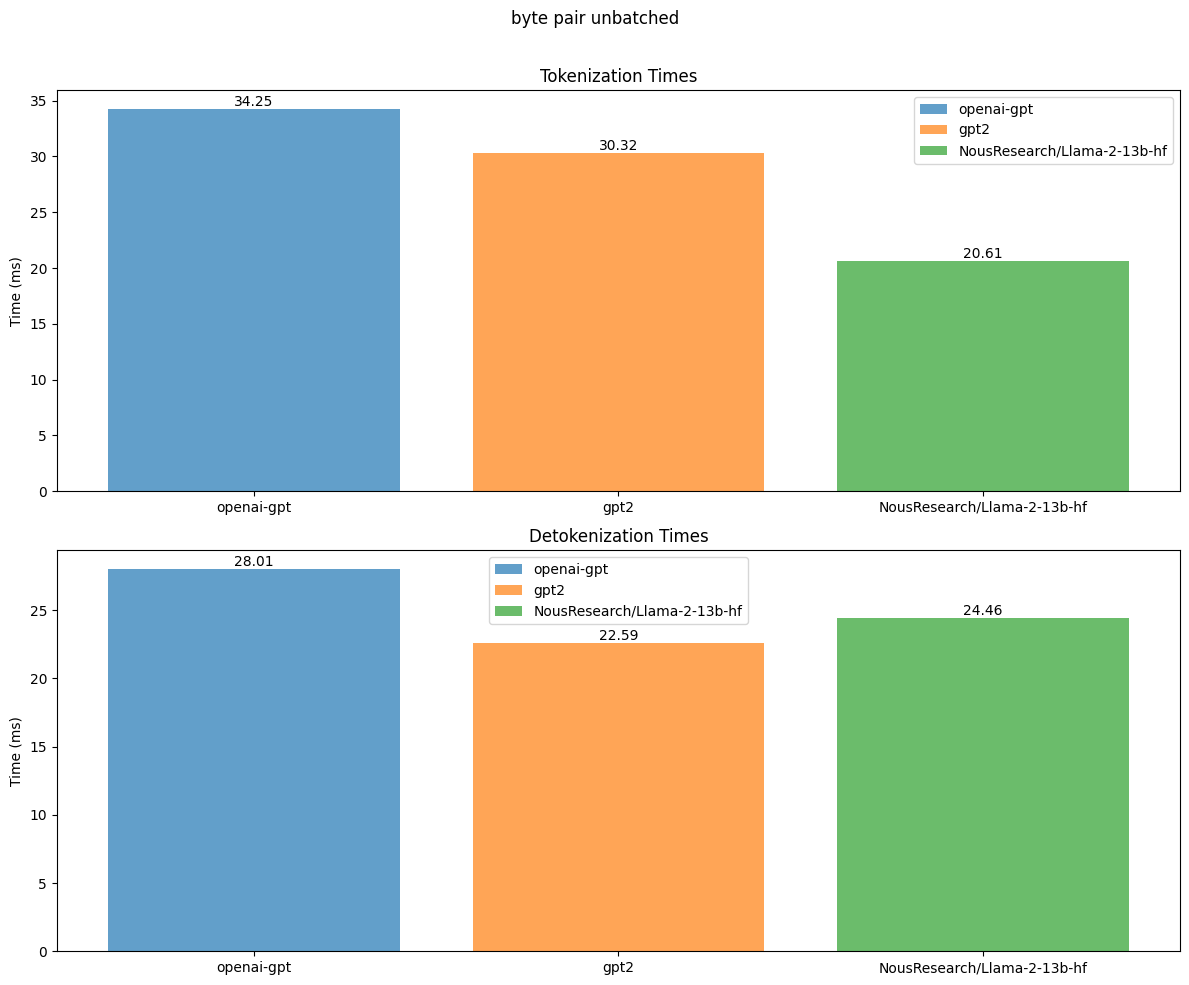

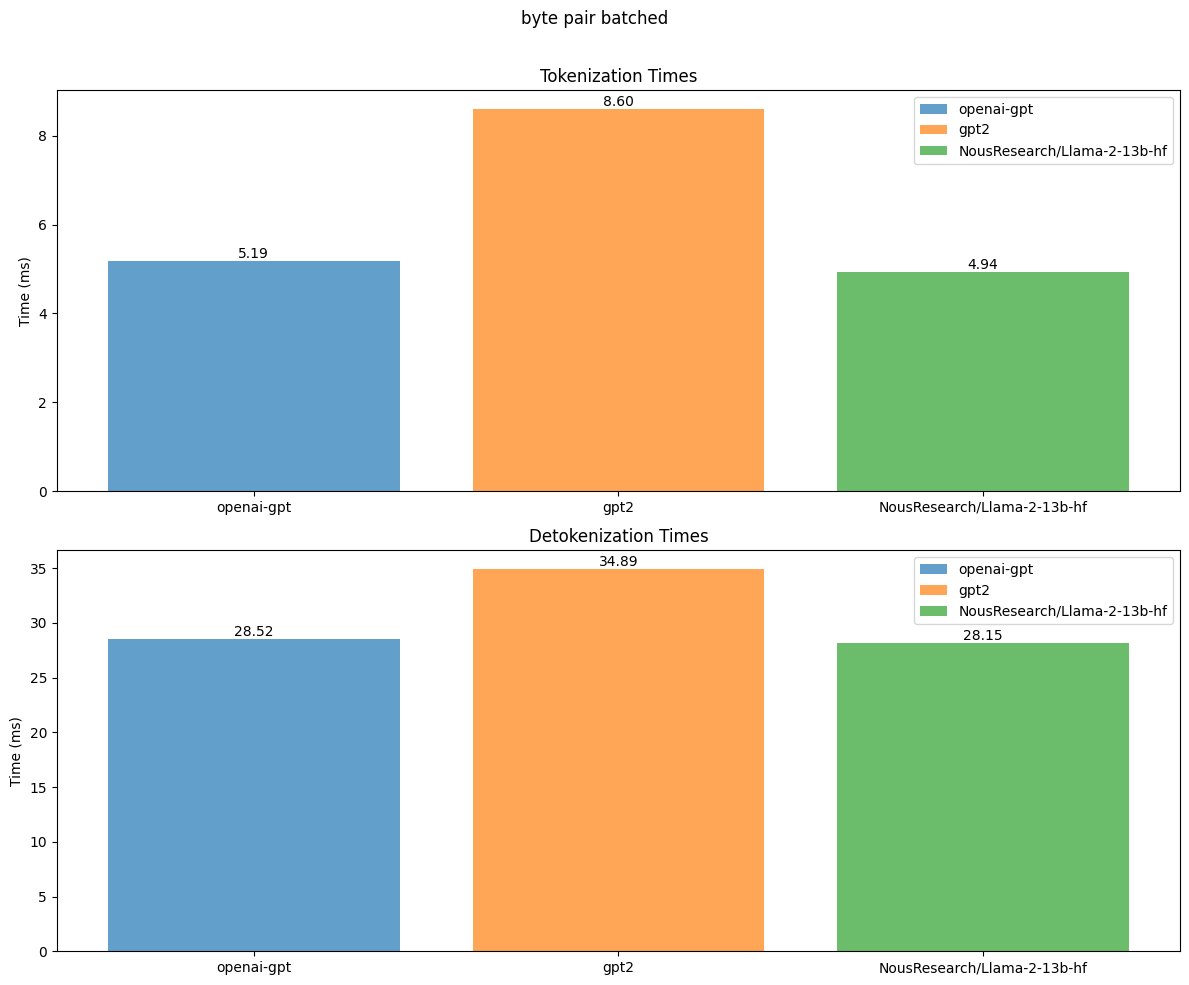

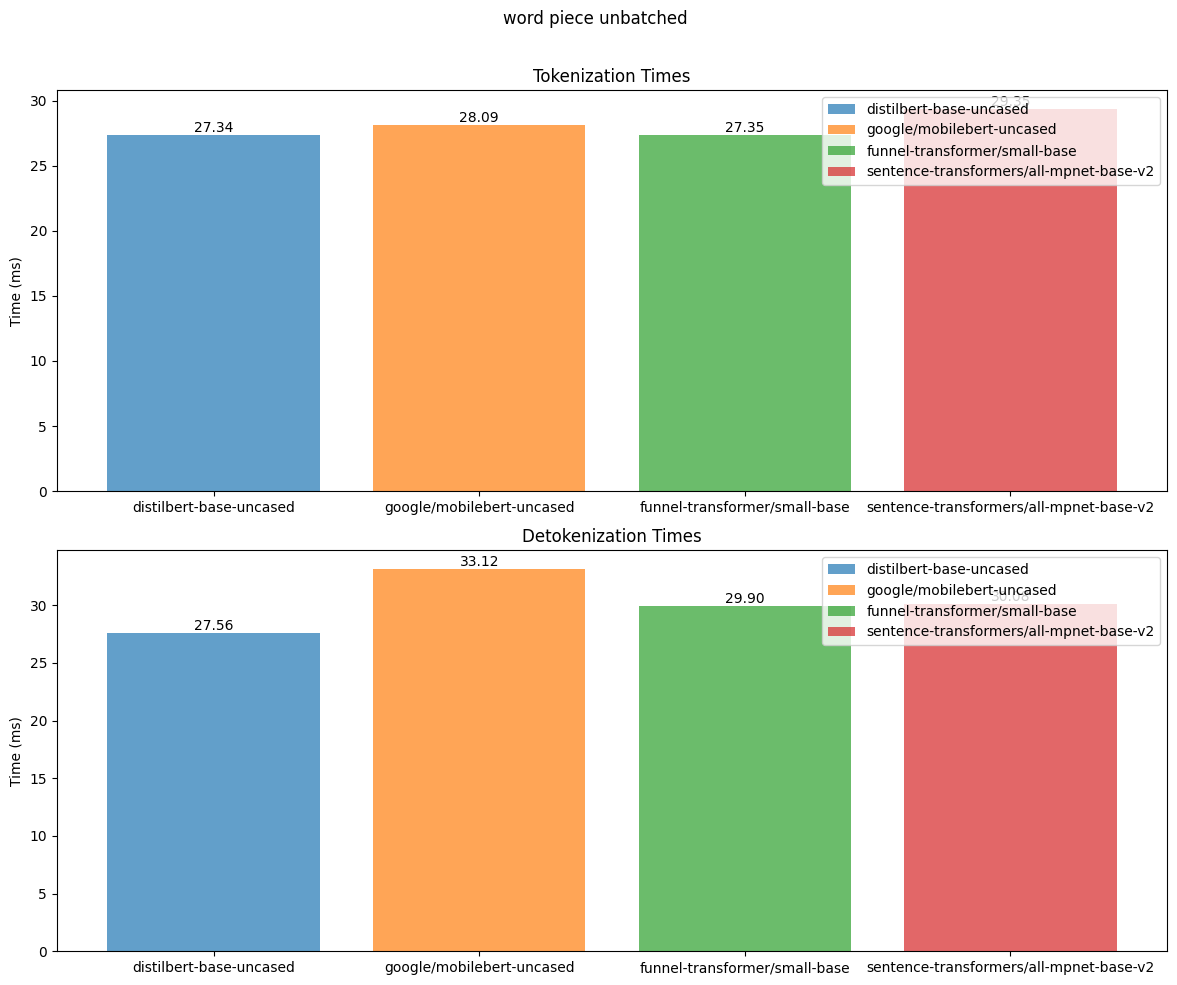

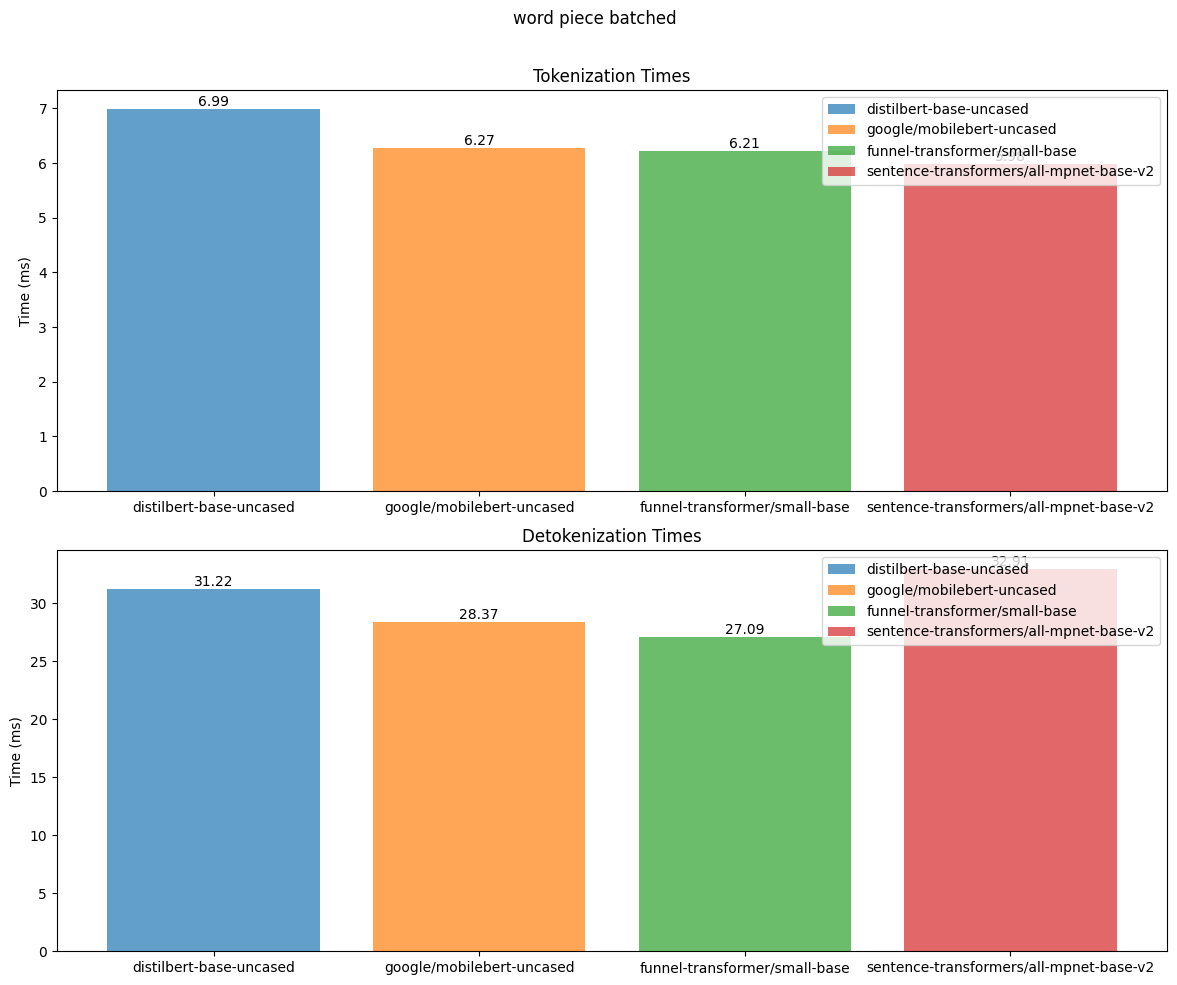

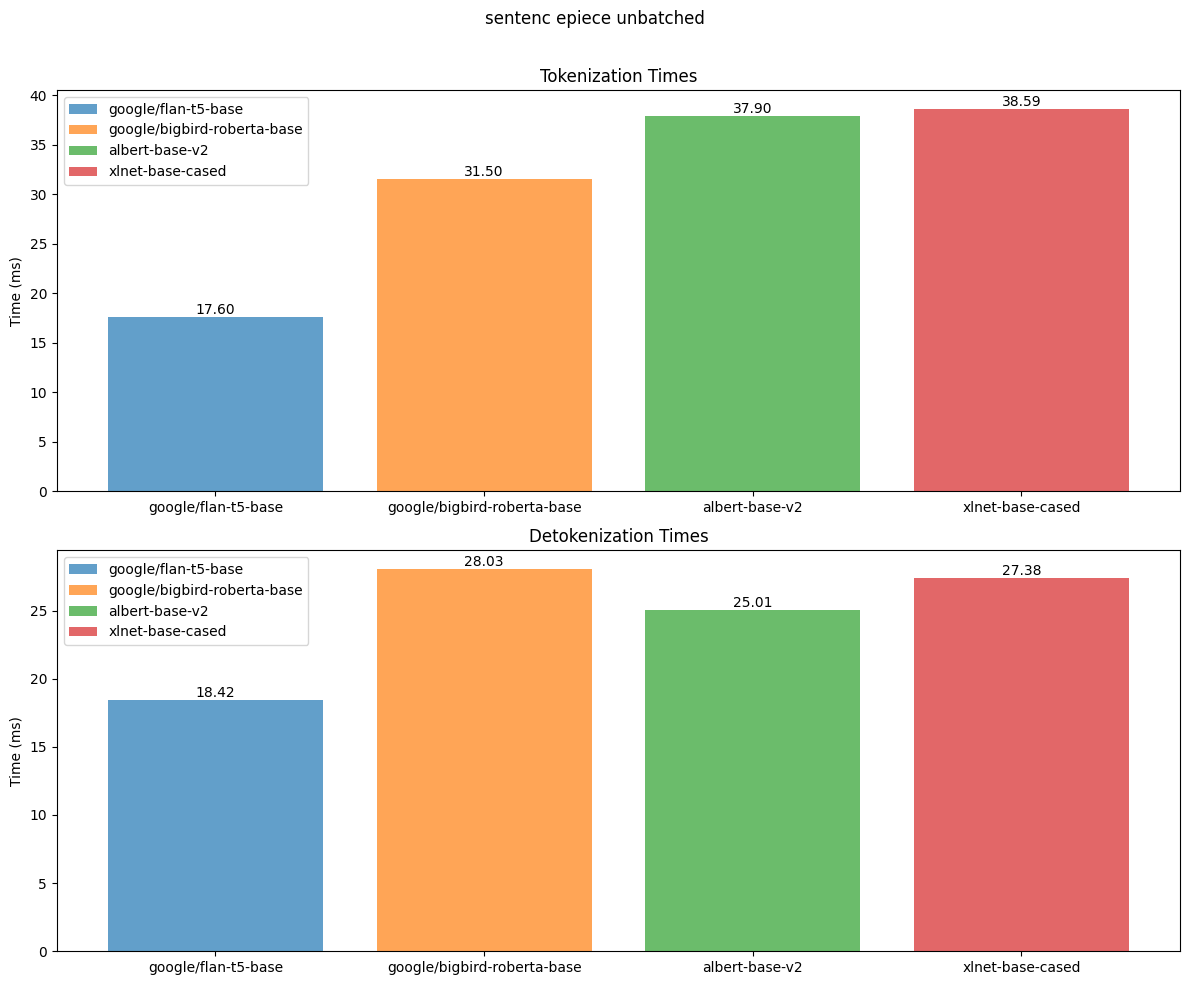

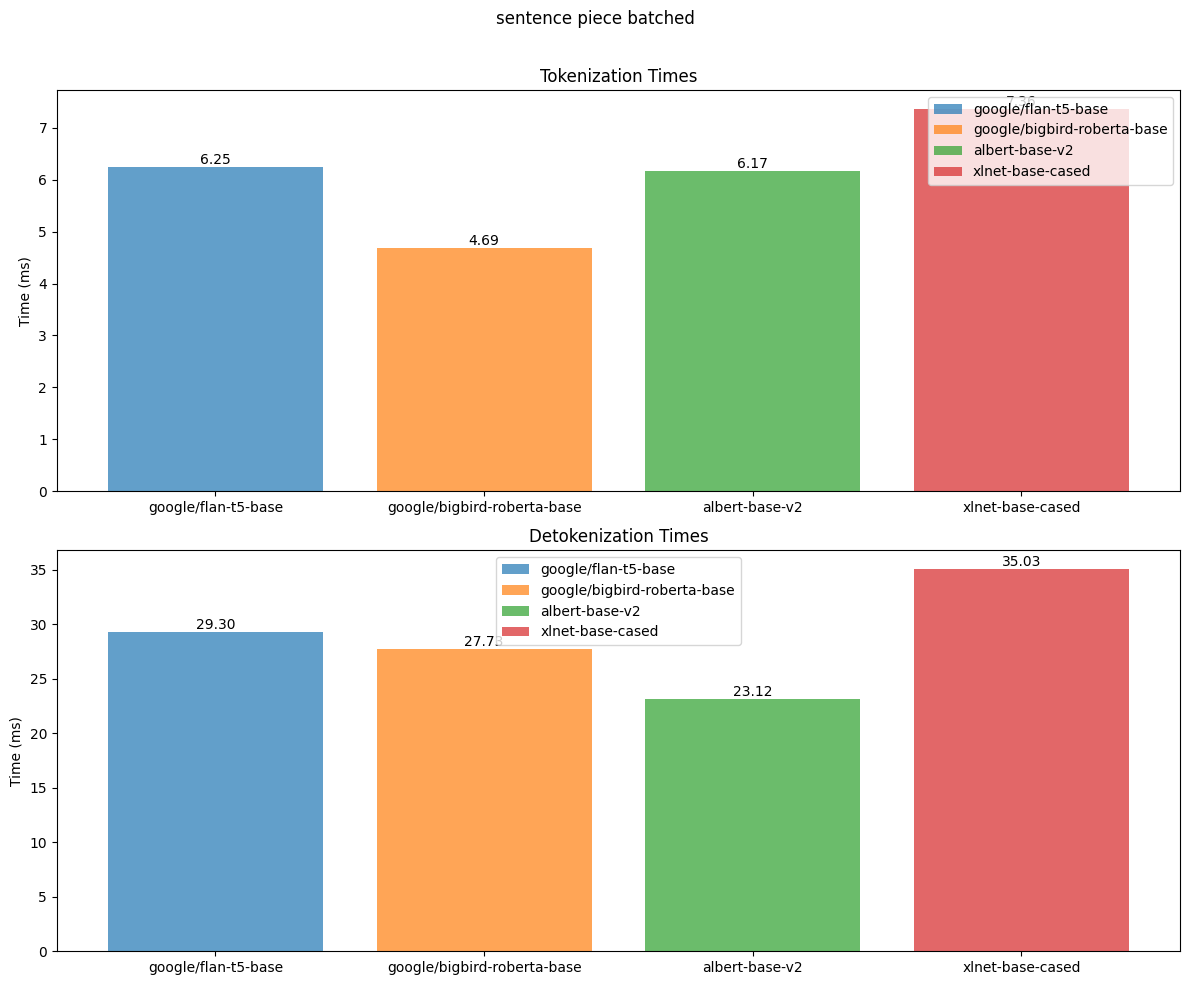

In [41]:
import matplotlib.pyplot as plt


def plot_dict(data_dict, title=''):
    # Extract method names and labels for the x-axis
    methods = list(data_dict.keys())
    x_labels = [f"{method}" for method in methods]

    # Create subplots for tokenization and detokenization times
    fig, axs = plt.subplots(2, figsize=(12, 10))
    fig.suptitle(title)

    for key, value in data_dict.items():
        if key == "method":
            continue

        # Plot tokenization times
        tokenization_time = value.get('Tokenization', 0.0)
        axs[0].bar(key, tokenization_time, label=key, alpha=0.7)

        # Plot detokenization times
        detokenization_time = value.get('Detokenization', 0.0)
        axs[1].bar(key, detokenization_time, label=key, alpha=0.7)

        # Add text labels on top of the bars
        axs[0].annotate(f'{tokenization_time:.2f}', (key, tokenization_time),
                            ha='center', va='bottom')
        axs[1].annotate(f'{detokenization_time:.2f}', (key, detokenization_time),
                            ha='center', va='bottom')

    # Set labels and titles
    axs[0].set_ylabel('Time (ms)')
    axs[0].set_title('Tokenization Times')
    axs[0].legend()

    axs[1].set_ylabel('Time (ms)')
    axs[1].set_title('Detokenization Times')
    axs[1].legend()

    # Show the plot
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()
    print("\n\n\n\n")
plot_dict(byte_pair_timing_unbatched, "byte pair unbatched")
plot_dict(byte_pair_timing_batched, "byte pair batched")
plot_dict(word_piece_timing_unbatched, "word piece unbatched")
plot_dict(word_piece_timing_batched, "word piece batched")
plot_dict(sentence_piece_timing_unbatched, "sentenc epiece unbatched")
plot_dict(sentence_piece_timing_batched, "sentence piece batched")


##Translation of corpus

In [ ]:
from transformers import M2M100ForConditionalGeneration, AutoTokenizer

def translate(corpus,language):
    # Load the pre-trained model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained("facebook/m2m100_418M", src_lang="en")
    model = M2M100ForConditionalGeneration.from_pretrained("facebook/m2m100_418M")

    # Initialize an empty list to store the translated sentences
    translated_corpus = []

    # Loop through each sentence in the input corpus
    for sentence in corpus:
        # Tokenize and encode the English sentence
        encoded_en = tokenizer(sentence, return_tensors="pt")

        # Generate the translation to Chinese
        generated_tokens = model.generate(**encoded_en, forced_bos_token_id=tokenizer.get_lang_id(language))

        # Decode the generated tokens back to text
        translated_sentence = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)

        #Print translated_sentence
        print(translated_sentence)

        # Append the translated sentence to the result list
        translated_corpus.append(translated_sentence)

    return translated_corpus


In [ ]:
chinese_corpus = translate(corpus2,"zh")
# Save the translations to a text file
with open("corpus_2_chinese.txt", "w", encoding="utf-8") as file:
    for translation in chinese_corpus:
        file.write(translation + "\n")

print("Translations saved to 'corpus_2_chinese.txt'.")

我希望你作为一个Linux终端行动,我会输入命令,你会回答什么终端应该显示,我希望你只用终端输出在一个独特的代码块内回复,没有别的东西,不要写解释,不要输入命令,除非我指示你这样做。


KeyboardInterrupt: ignored

##Other languages

In [3]:
def read_from_file(name):
  # Open the file for reading
  with open(name, 'r') as file:
      # Read all lines from the file and store them in a list
      lines = [line.strip() for line in file]
      return lines

!gdown 1PflB7C7BHccK47KKRUbRW1wR4OSMUxXO #downloading corpus_1_chinese.txt
!gdown 1cH4k1NSNnSImSJMqV7WUeINW-BIv8Sl_ #downloading corpus_1_espanol.txt
!gdown 1A4JOVzqk8houWPbMp6YbRm1dsSlYyLVM #downloading corpus_2_chinese.txt
!gdown 1z6sSljlNvOmvcYVK9lYg9OcyAvjkVvRp #downloading corpus_2_espanol.txt
zh1_array = read_from_file("corpus_1_chinese.txt")
zh2_array = read_from_file("corpus_2_chinese.txt")
es1_array = read_from_file("corpus_1_espanol.txt")
es2_array = read_from_file("corpus_2_espanol.txt")

chinese_models = ["bert-base-chinese", "bert-base-multilingual-cased", "OpenBuddy/openbuddy-llama2-70b-v10.1-bf16", "distilbert-base-multilingual-cased", "xlm-roberta-base"]
spanish_models = ["bert-base-multilingual-cased", "distilbert-base-multilingual-cased", "xlm-roberta-base"]

Downloading...
From: https://drive.google.com/uc?id=1PflB7C7BHccK47KKRUbRW1wR4OSMUxXO
To: /content/corpus_1_chinese.txt
100% 11.3k/11.3k [00:00<00:00, 31.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cH4k1NSNnSImSJMqV7WUeINW-BIv8Sl_
To: /content/corpus_1_espanol.txt
100% 14.2k/14.2k [00:00<00:00, 32.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A4JOVzqk8houWPbMp6YbRm1dsSlYyLVM
To: /content/corpus_2_chinese.txt
100% 48.5k/48.5k [00:00<00:00, 53.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z6sSljlNvOmvcYVK9lYg9OcyAvjkVvRp
To: /content/corpus_2_espanol.txt
100% 74.6k/74.6k [00:00<00:00, 71.5MB/s]


##Chinese Tokenization and Detokenization

In [ ]:
print("--------------------------Unbatched Chinese Corpus 1 Data-------------------------------")
chinese_corpus1_timing_unbatched = analyse_encode_plus(chinese_models, zh1_array)
print("--------------------------Batched Chinese Corpus 1 Data-------------------------------")
chinese_corpus1_timing_batched = analyse_batch(chinese_models,zh1_array)
print("--------------------------Unbatched Chinese Corpus 2 Data-------------------------------")
chinese_corpus2_timing_unbatched = analyse_encode_plus(chinese_models, zh2_array)
print("--------------------------Batched Chinese Corpus 2 Data-------------------------------")
chinese_corpus2_timing_batched = analyse_batch(chinese_models,zh2_array)

--------------------------Unbatched Chinese Corpus 1 Data-------------------------------
bert-base-chinese:
Tokenization Time: 34.92856025695801 ms
Detokenization Time: 72.86190986633301 ms
bert-base-multilingual-cased:
Tokenization Time: 42.307376861572266 ms
Detokenization Time: 73.17757606506348 ms
OpenBuddy/openbuddy-llama2-70b-v10.1-bf16:
Tokenization Time: 24.857282638549805 ms
Detokenization Time: 61.40494346618652 ms
distilbert-base-multilingual-cased:
Tokenization Time: 36.78488731384277 ms
Detokenization Time: 84.03849601745605 ms
xlm-roberta-base:
Tokenization Time: 49.80182647705078 ms
Detokenization Time: 50.73904991149902 ms
{'method': 'Unbatched', 'bert-base-chinese': {'Tokenization': 34.92856025695801, 'Detokenization': 72.86190986633301}, 'bert-base-multilingual-cased': {'Tokenization': 42.307376861572266, 'Detokenization': 73.17757606506348}, 'OpenBuddy/openbuddy-llama2-70b-v10.1-bf16': {'Tokenization': 24.857282638549805, 'Detokenization': 61.40494346618652}, 'distil

# `SpaCy Tokenization EN-ZH-ES`

-----------UNBATCHED TOKENIZATION-----------
Corpus 1 EN Average: {'Tokenization Time ': 1521.2528228759766}  ms
-----------BATCHED TOKENIZATION-----------
Corpus 1 EN Average: {'Tokenization Time ': 538.2737159729004}  ms
-----------UNBATCHED TOKENIZATION-----------
Corpus 2 EN Average: {'Tokenization Time ': 3301.801633834839}  ms
-----------BATCHED TOKENIZATION-----------
Corpus 2 EN Average: {'Tokenization Time ': 2138.1750345230103}  ms
-----------UNBATCHED ZH 1 TOKENIZATION-----------


NameError: name 'zh1_array' is not defined

## Unbatched Chinese Corpus 1 Data Graph Analysis

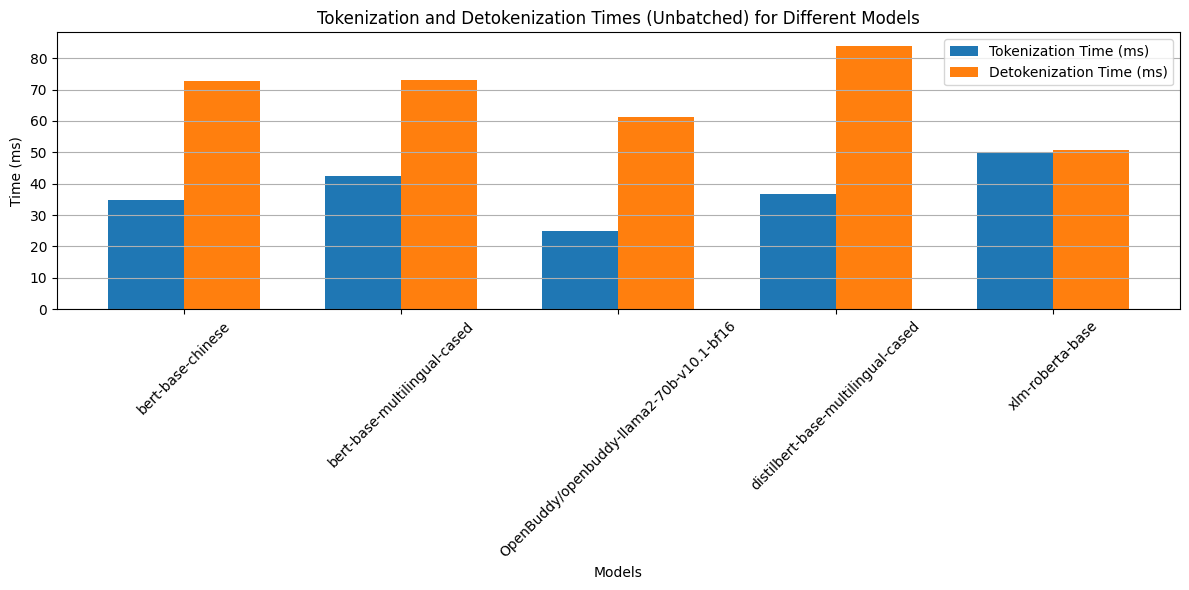

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = [
    'bert-base-chinese',
    'bert-base-multilingual-cased',
    'OpenBuddy/openbuddy-llama2-70b-v10.1-bf16',
    'distilbert-base-multilingual-cased',
    'xlm-roberta-base'
]

tokenization_times = [
    chinese_corpus1_timing_unbatched[model]['Tokenization'] for model in models
]

detokenization_times = [
    chinese_corpus1_timing_unbatched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Unbatched) for Different Models')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


## Batched Chinese Corpus 1 Graph Analysis(Bar Chart)

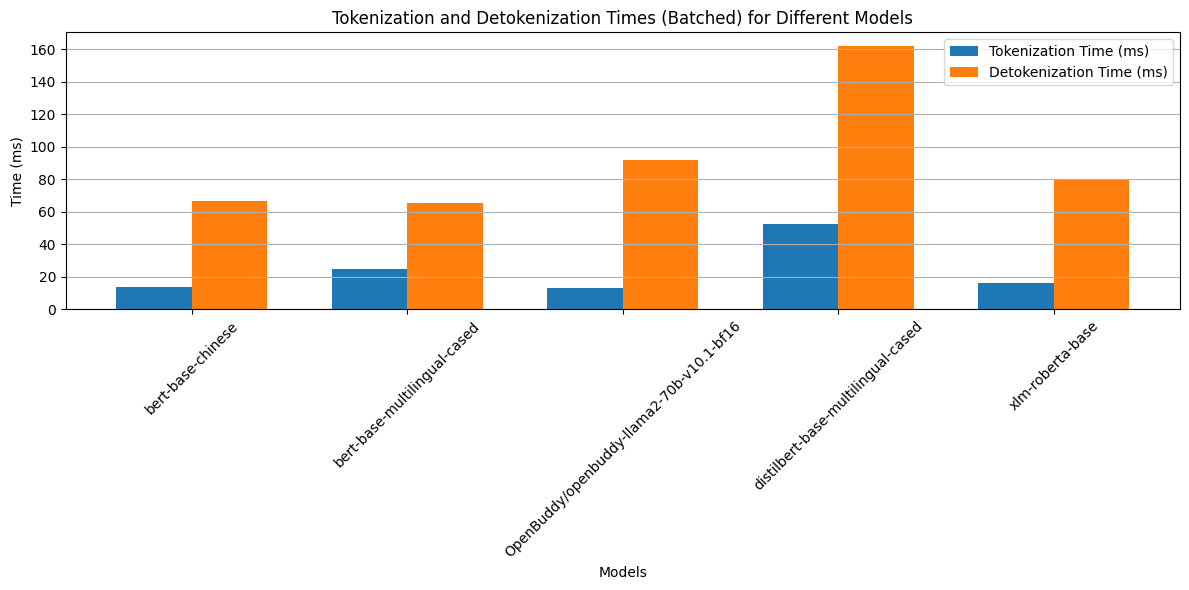

In [ ]:

# Data
models = [
    'bert-base-chinese',
    'bert-base-multilingual-cased',
    'OpenBuddy/openbuddy-llama2-70b-v10.1-bf16',
    'distilbert-base-multilingual-cased',
    'xlm-roberta-base'
]

tokenization_times = [
    chinese_corpus1_timing_batched[model]['Tokenization'] for model in models
]

detokenization_times = [
    chinese_corpus1_timing_batched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Batched) for Different Models')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


## Graph Analysis For Chinese Corpus 2 batched

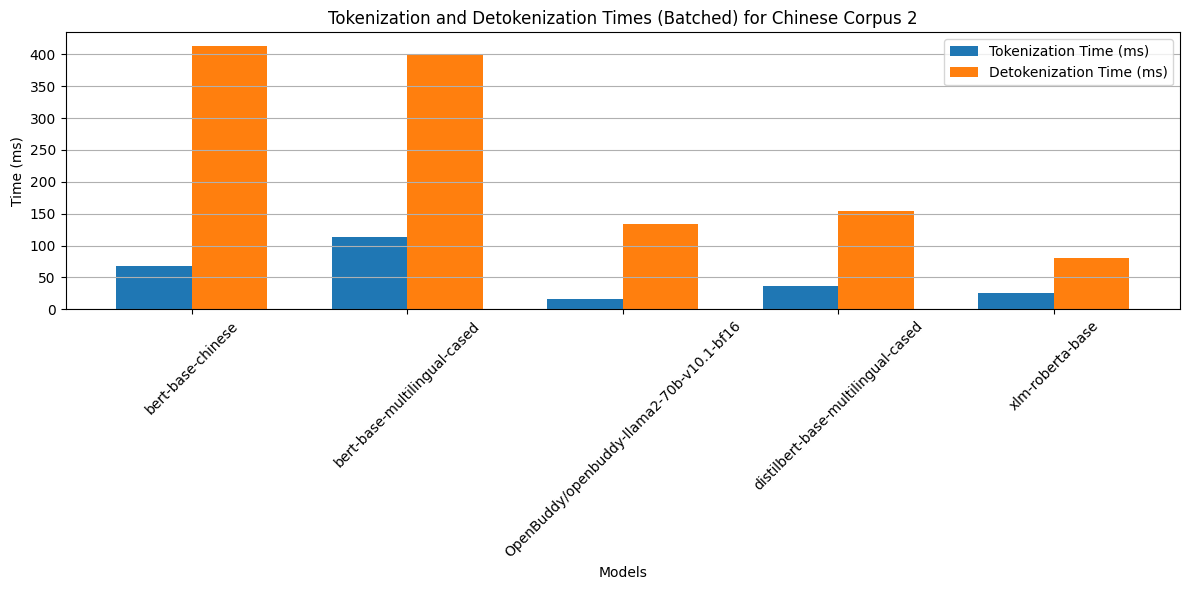

In [ ]:

# Data for chinese_corpus2_timing_batched
models = [
    'bert-base-chinese',
    'bert-base-multilingual-cased',
    'OpenBuddy/openbuddy-llama2-70b-v10.1-bf16',
    'distilbert-base-multilingual-cased',
    'xlm-roberta-base'
]

tokenization_times_batched = [
    chinese_corpus2_timing_batched[model]['Tokenization'] for model in models
]

detokenization_times_batched = [
    chinese_corpus2_timing_batched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))

# Create bar chart for chinese_corpus2_timing_batched
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times_batched, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times_batched, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Batched) for Chinese Corpus 2')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


## Graph Analysis For Chinese Corpus 2 Unbatched

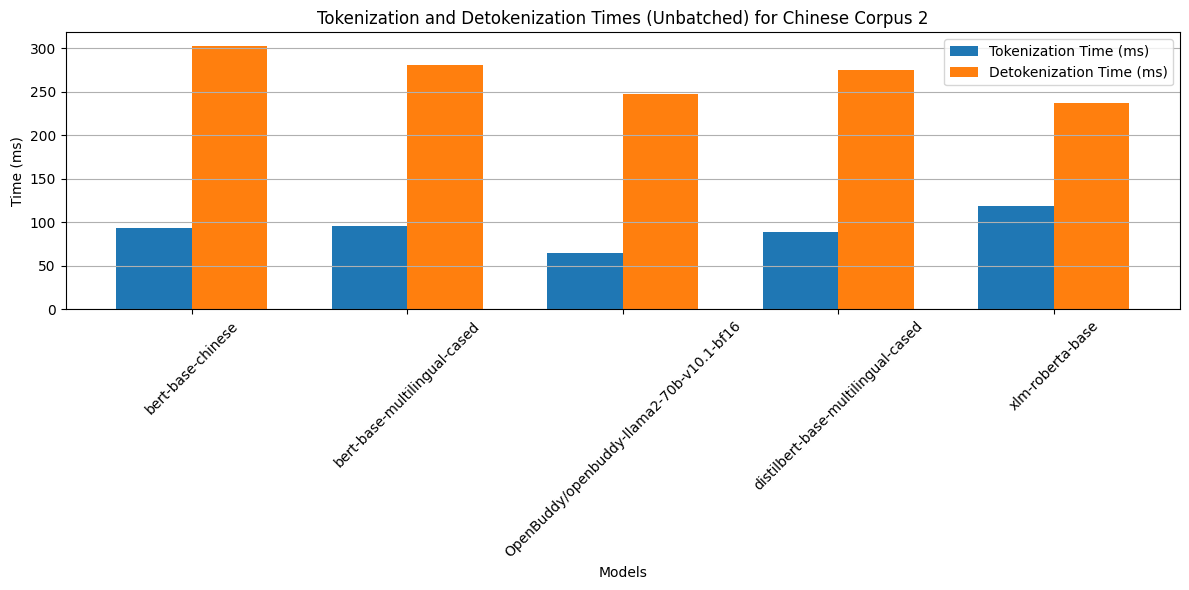

In [ ]:
# Data for chinese_corpus2_timing_unbatched
models = [
    'bert-base-chinese',
    'bert-base-multilingual-cased',
    'OpenBuddy/openbuddy-llama2-70b-v10.1-bf16',
    'distilbert-base-multilingual-cased',
    'xlm-roberta-base'
]

tokenization_times_unbatched = [
    chinese_corpus2_timing_unbatched[model]['Tokenization'] for model in models
]

detokenization_times_unbatched = [
    chinese_corpus2_timing_unbatched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))

# Create bar chart for chinese_corpus2_timing_unbatched
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times_unbatched, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times_unbatched, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Unbatched) for Chinese Corpus 2')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


##Spanish Tokenization and Detokenization

In [ ]:
print("--------------------------Unbatched Spanish Corpus 1 Data-------------------------------")
spanish_corpus1_timing_unbatched = analyse_encode_plus(spanish_models, es1_array)
print(spanish_corpus1_timing_unbatched)
print("--------------------------Batched Spanish Corpus 1 Data-------------------------------")
spanish_corpus1_timing_batched = analyse_batch(spanish_models,es1_array)
print("--------------------------Unbatched Spanish Corpus 2 Data-------------------------------")
spanish_corpus2_timing_unbatched = analyse_encode_plus(spanish_models, es2_array)
print("--------------------------Batched Spanish Corpus 2 Data-------------------------------")
spanish_corpus2_timing_batched = analyse_batch(spanish_models,es2_array)

--------------------------Unbatched Spanish Corpus 1 Data-------------------------------
bert-base-multilingual-cased:
Tokenization Time: 37.08600997924805 ms
Detokenization Time: 85.80398559570312 ms
distilbert-base-multilingual-cased:
Tokenization Time: 78.83524894714355 ms
Detokenization Time: 122.6038932800293 ms
xlm-roberta-base:
Tokenization Time: 71.43616676330566 ms
Detokenization Time: 110.28766632080078 ms
{'method': 'Unbatched', 'bert-base-multilingual-cased': {'Tokenization': 37.08600997924805, 'Detokenization': 85.80398559570312}, 'distilbert-base-multilingual-cased': {'Tokenization': 78.83524894714355, 'Detokenization': 122.6038932800293}, 'xlm-roberta-base': {'Tokenization': 71.43616676330566, 'Detokenization': 110.28766632080078}}
--------------------------Batched Spanish Corpus 1 Data-------------------------------
bert-base-multilingual-cased:
Tokenization Time: 42.04535484313965 ms
Detokenization Time: 89.9055004119873 ms
distilbert-base-multilingual-cased:
Tokenizat

##Spanish corpus 1 token and detoken graph analysis unbatched data

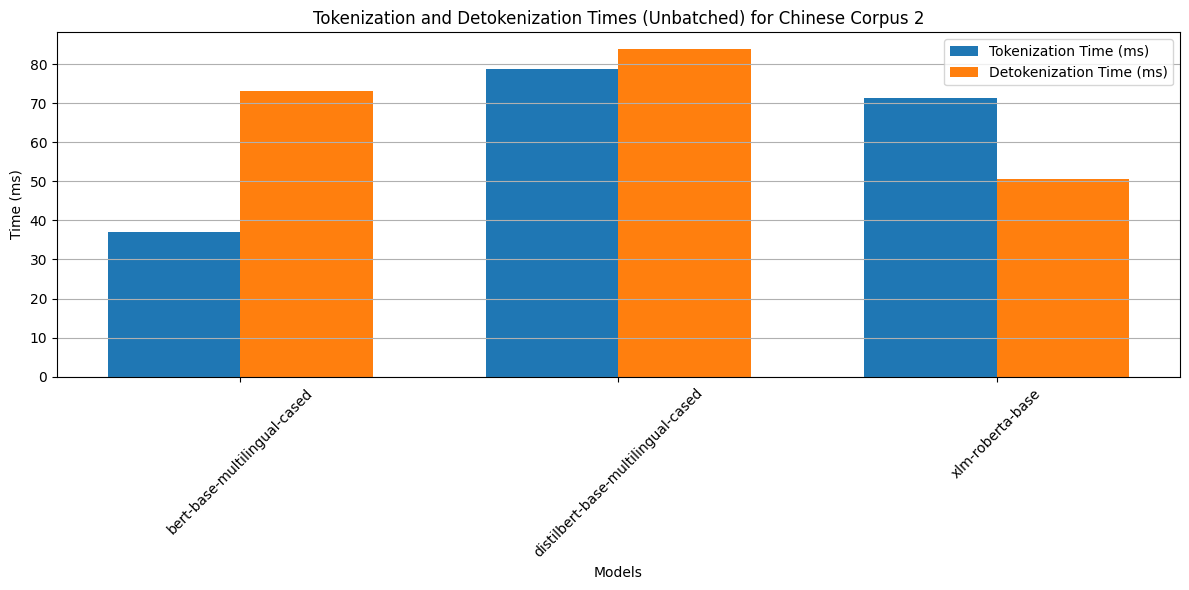

In [ ]:

models = [
  "bert-base-multilingual-cased", "distilbert-base-multilingual-cased", "xlm-roberta-base"
]

tokenization_times_unbatched = [
    spanish_corpus1_timing_unbatched[model]['Tokenization'] for model in models
]

detokenization_times_unbatched = [
    chinese_corpus1_timing_unbatched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))


plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times_unbatched, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times_unbatched, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Unbatched) for Chinese Corpus 2')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


##Spanish corpus 1 token and detoken graph Analysis batched data

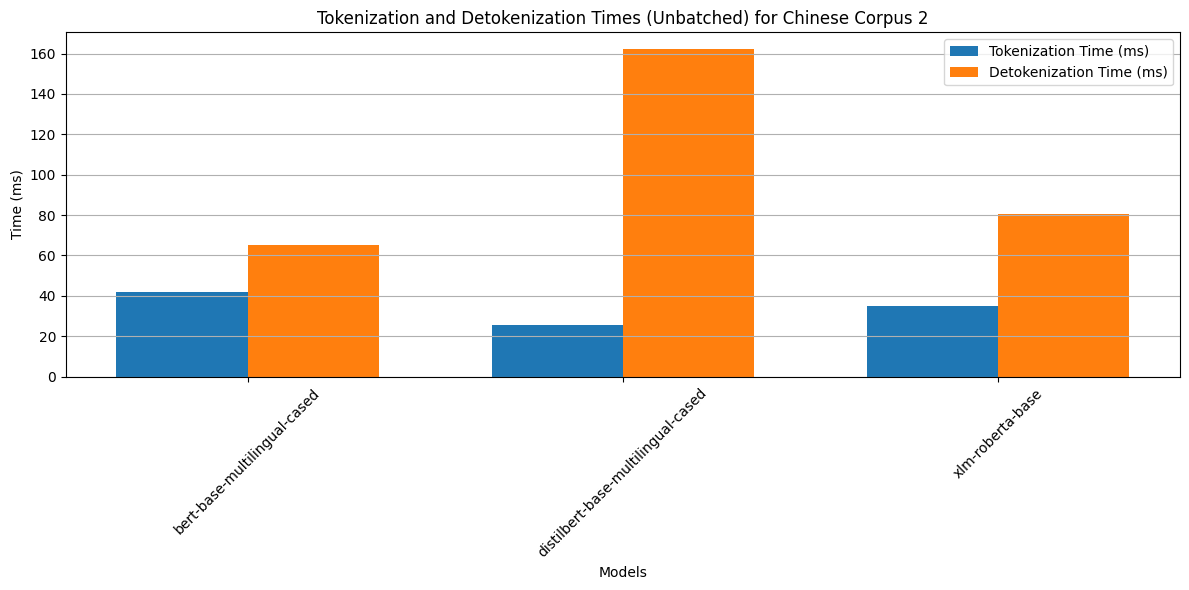

In [ ]:

models = [
  "bert-base-multilingual-cased", "distilbert-base-multilingual-cased", "xlm-roberta-base"
]

tokenization_times_unbatched = [
    spanish_corpus1_timing_batched[model]['Tokenization'] for model in models
]

detokenization_times_unbatched = [
    chinese_corpus1_timing_batched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))

plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times_unbatched, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times_unbatched, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Unbatched) for Chinese Corpus 2')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


##Spanish corpus 2 token and detoken graph analysis unbatched data

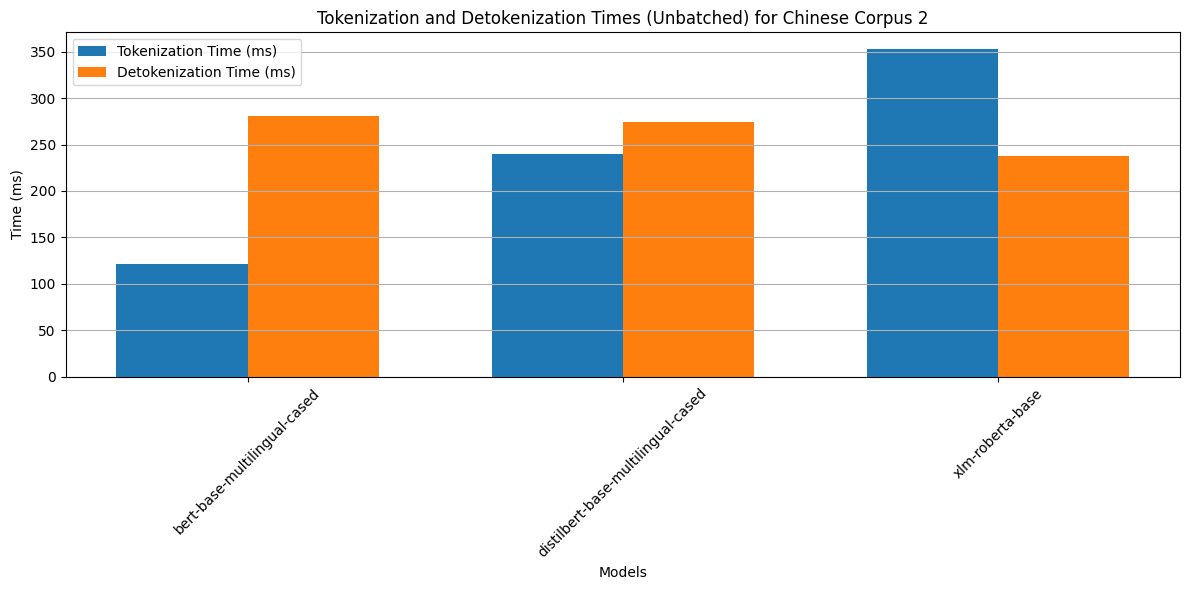

In [ ]:

models = [
  "bert-base-multilingual-cased", "distilbert-base-multilingual-cased", "xlm-roberta-base"
]

tokenization_times_unbatched = [
    spanish_corpus2_timing_unbatched[model]['Tokenization'] for model in models
]

detokenization_times_unbatched = [
    chinese_corpus2_timing_unbatched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))


plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times_unbatched, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times_unbatched, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Unbatched) for Chinese Corpus 2')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


##Spanish corpus 2 token and detoken graph analysis batched data

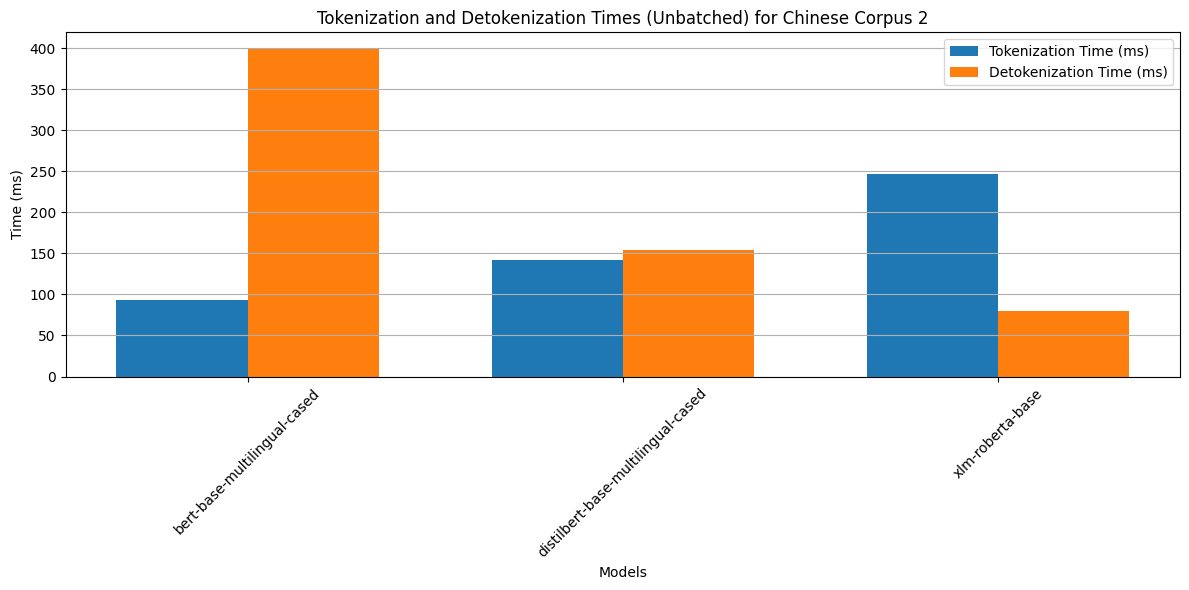

In [ ]:
# Data for chinese_corpus2_timing_unbatched
models = [
  "bert-base-multilingual-cased", "distilbert-base-multilingual-cased", "xlm-roberta-base"
]

tokenization_times_unbatched = [
    spanish_corpus2_timing_batched[model]['Tokenization'] for model in models
]

detokenization_times_unbatched = [
    chinese_corpus2_timing_batched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))

# Create bar chart for chinese_corpus2_timing_unbatched
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times_unbatched, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times_unbatched, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Unbatched) for Chinese Corpus 2')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


In [ ]:
print(byte_pair_timing_unbatched)
print(byte_pair_timing_batched)
print(word_piece_timing_unbatched)
print(word_piece_timing_batched)
print(sentence_piece_timing_unbatched)
print(sentence_piece_timing_batched)
print(unigram_timing_unbatched)
print(unigram_timing_batched)
print(chinese_corpus1_timing_unbatched)
print(chinese_corpus1_timing_batched)
print(chinese_corpus2_timing_unbatched)
print(chinese_corpus2_timing_batched)
print(spanish_corpus1_timing_unbatched)
print(spanish_corpus1_timing_batched)
print(spanish_corpus2_timing_unbatched)
print(spanish_corpus2_timing_batched)

{'method': 'Unbatched', 'openai-gpt': {'Tokenization': 23.493051528930664, 'Detokenization': 8274.685621261597}, 'gpt2': {'Tokenization': 28.712749481201172, 'Detokenization': 27.922868728637695}, 'NousResearch/Llama-2-13b-hf': {'Tokenization': 25.57992935180664, 'Detokenization': 33.15925598144531}}
{'method': 'Batched', 'openai-gpt': {'Tokenization': 13.199567794799805, 'Detokenization': 21.755695343017578}, 'gpt2': {'Tokenization': 12.187004089355469, 'Detokenization': 22.495746612548828}, 'NousResearch/Llama-2-13b-hf': {'Tokenization': 19.573211669921875, 'Detokenization': 25.72464942932129}}
{'method': 'Unbatched', 'distilbert-base-uncased': {'Tokenization': 20.777463912963867, 'Detokenization': 30.34043312072754}, 'google/mobilebert-uncased': {'Tokenization': 40.883779525756836, 'Detokenization': 60.217857360839844}, 'funnel-transformer/small-base': {'Tokenization': 46.176910400390625, 'Detokenization': 58.12668800354004}, 'sentence-transformers/all-mpnet-base-v2': {'Tokenization

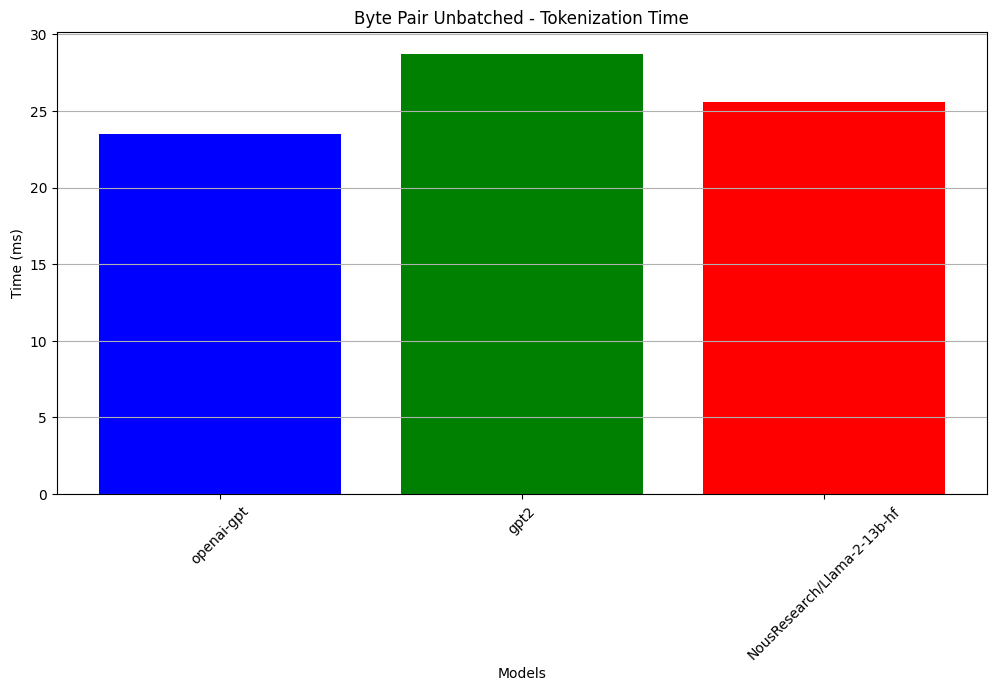

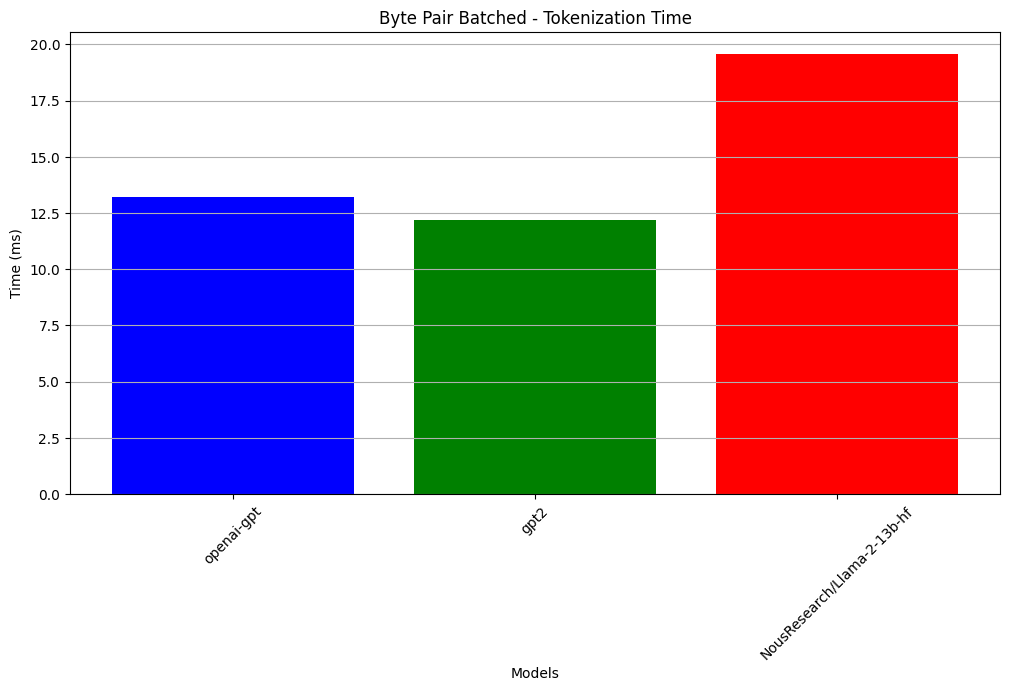

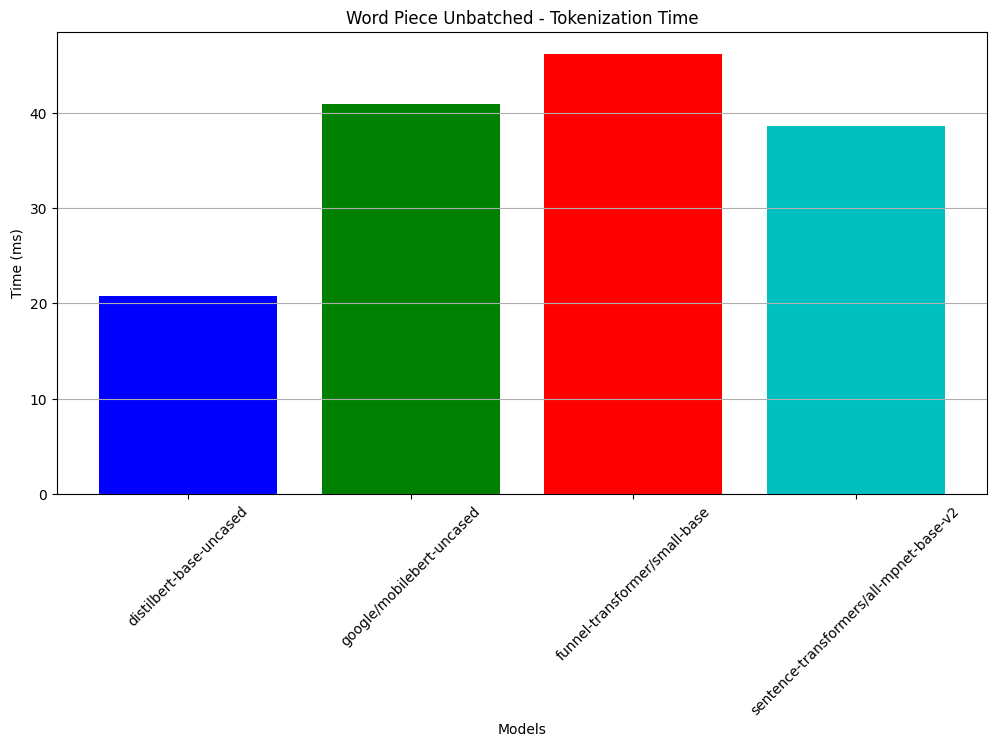

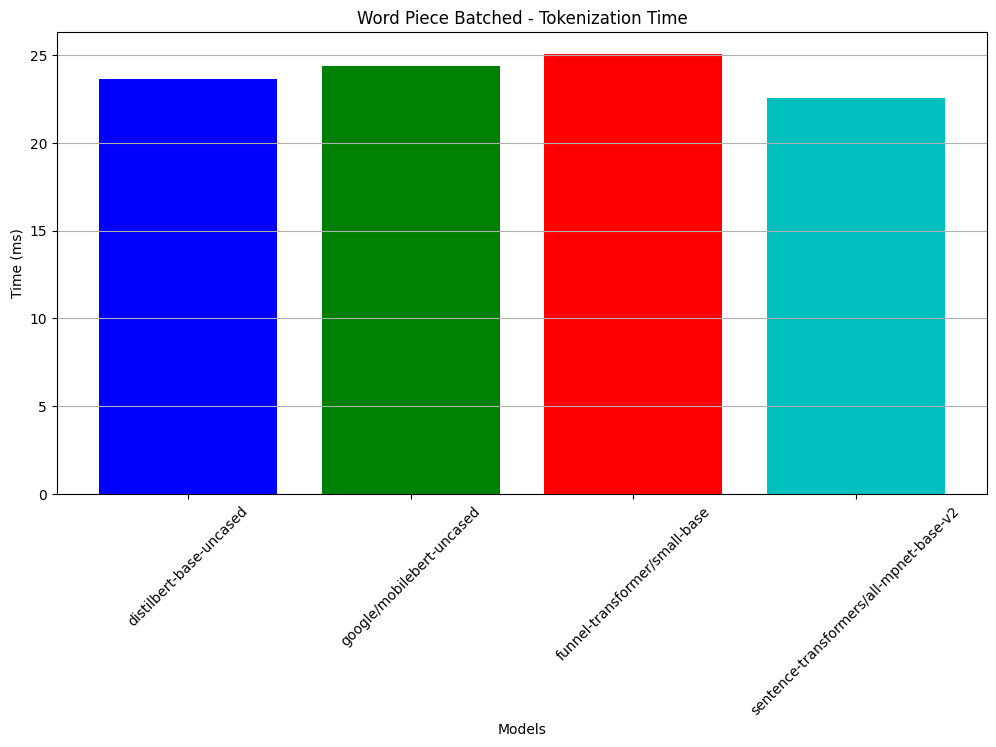

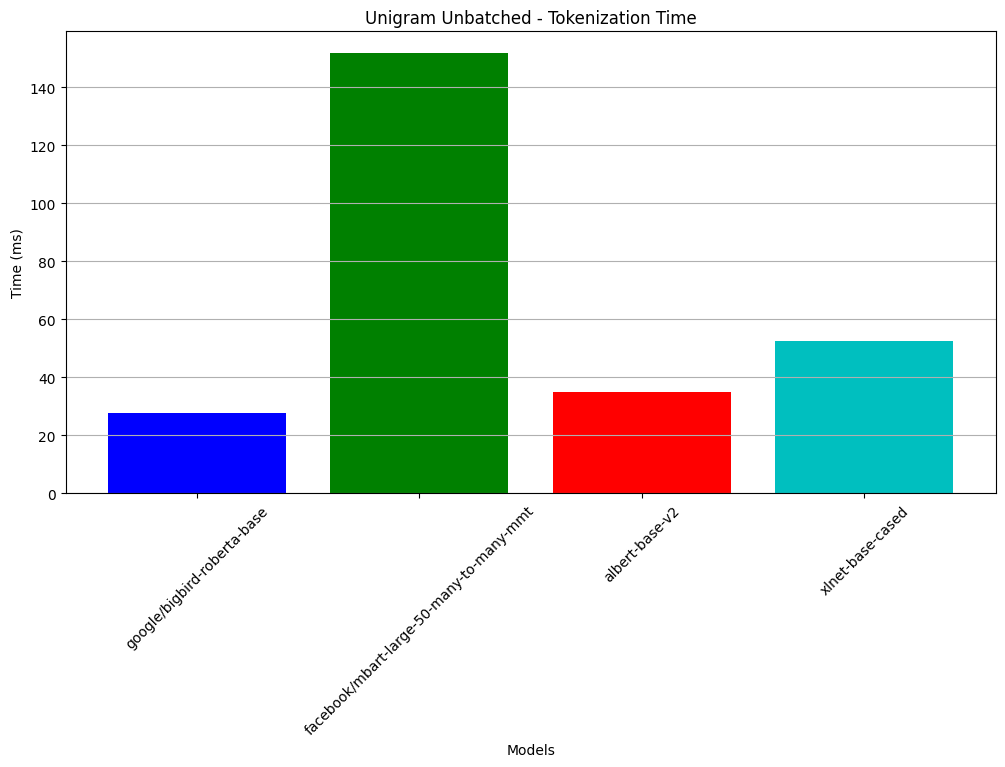

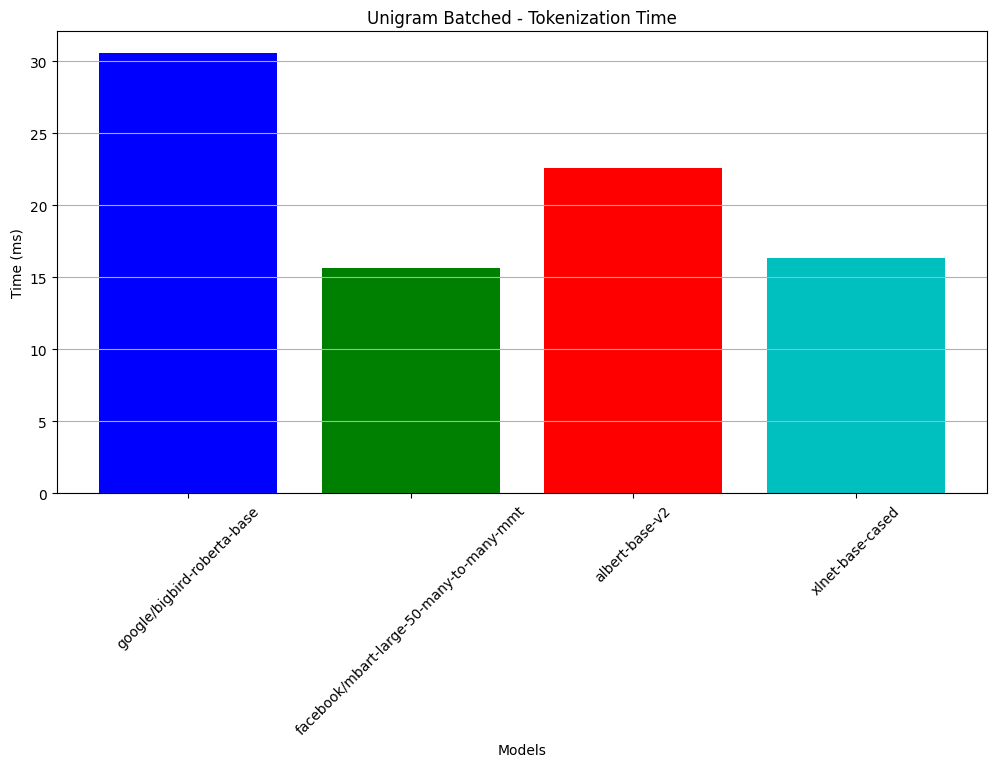

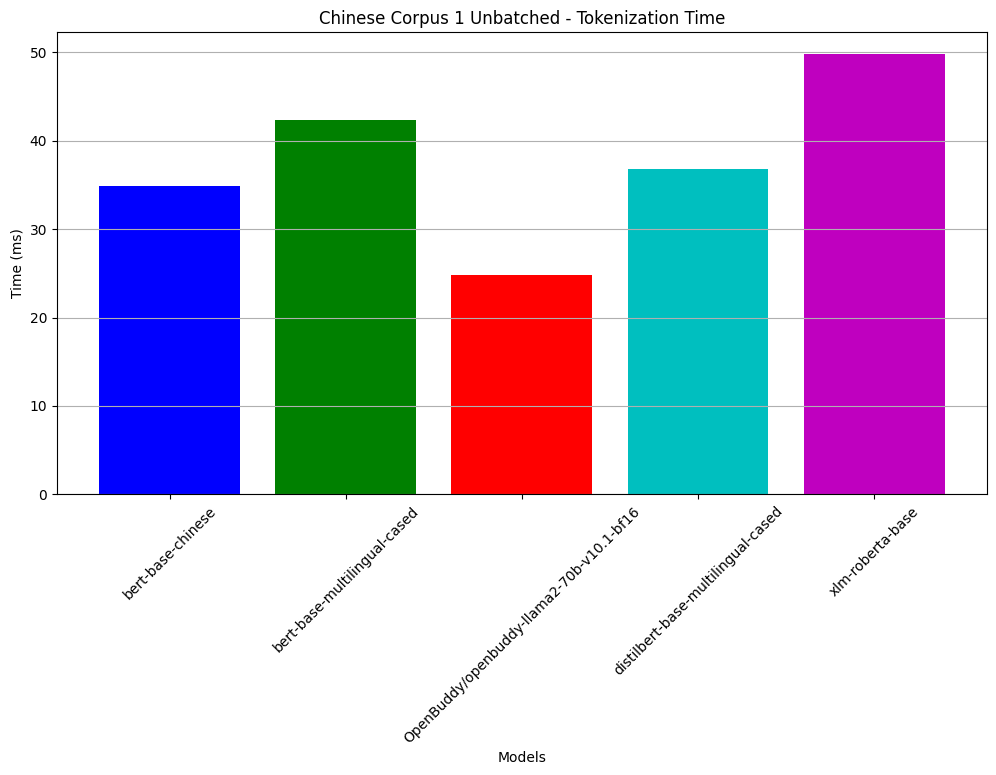

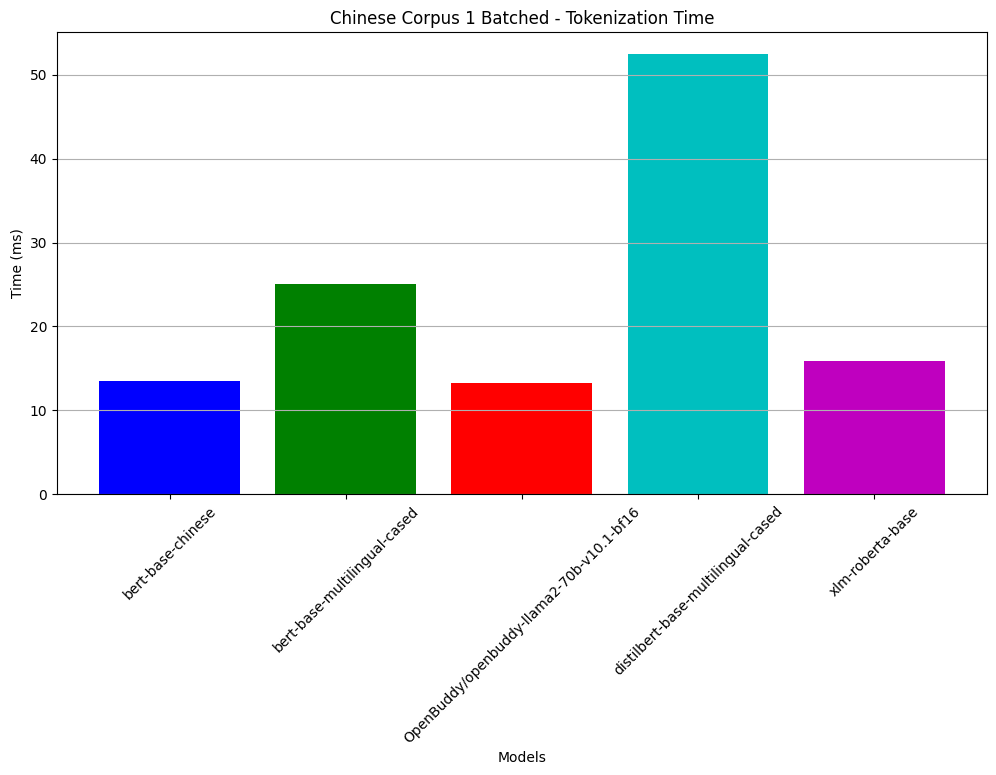

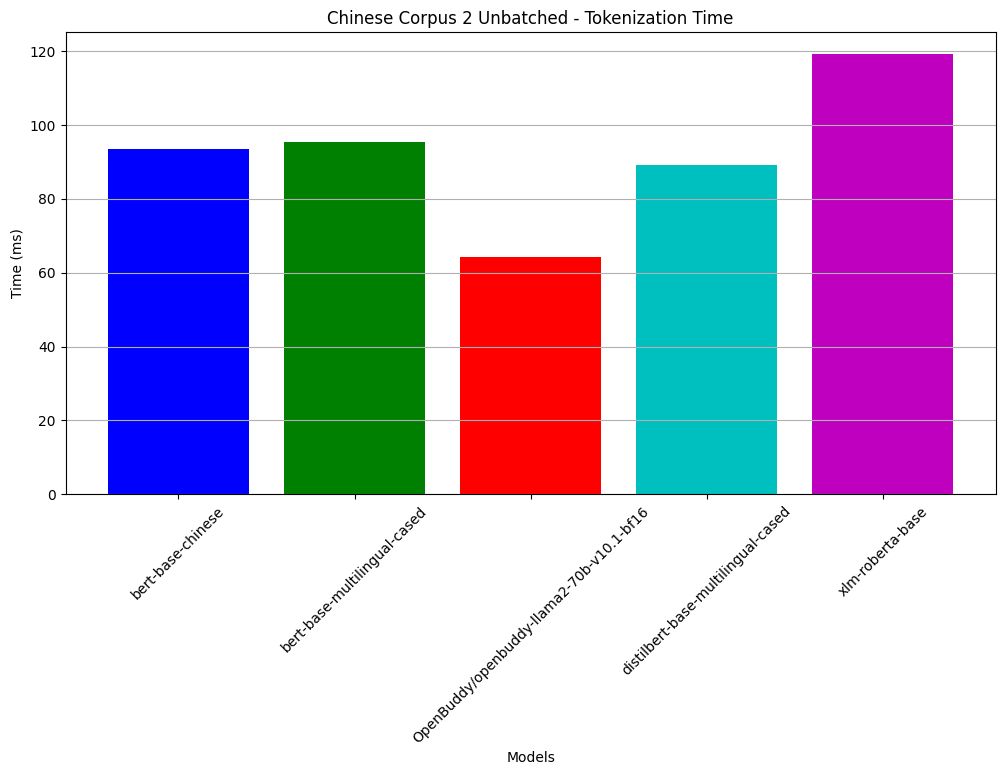

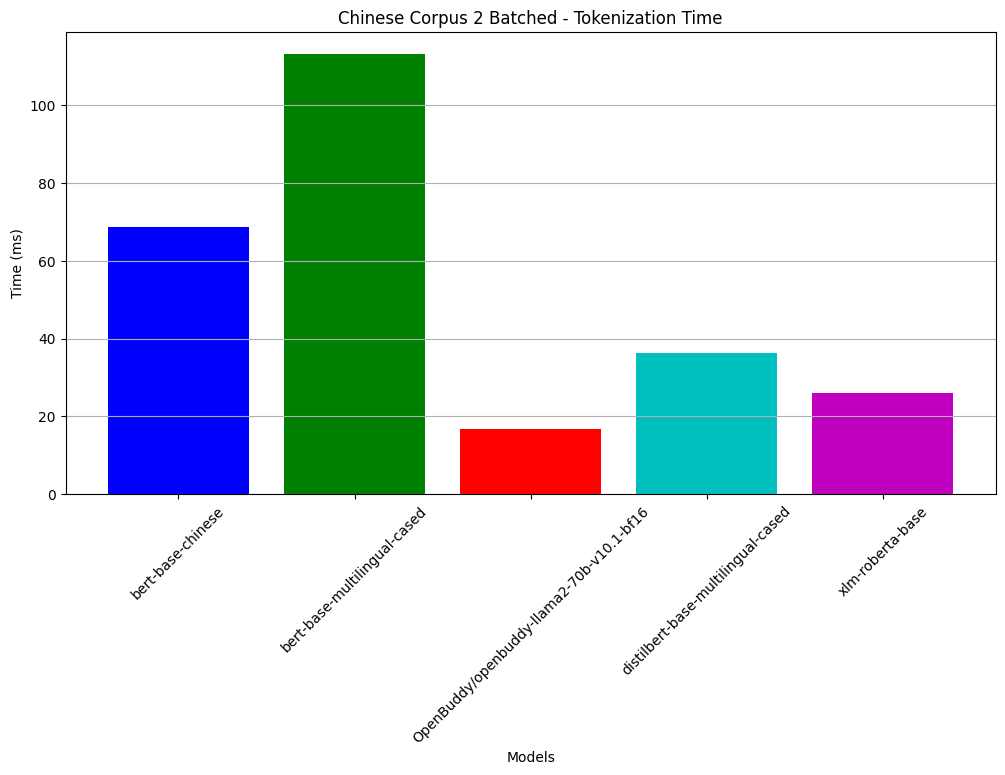

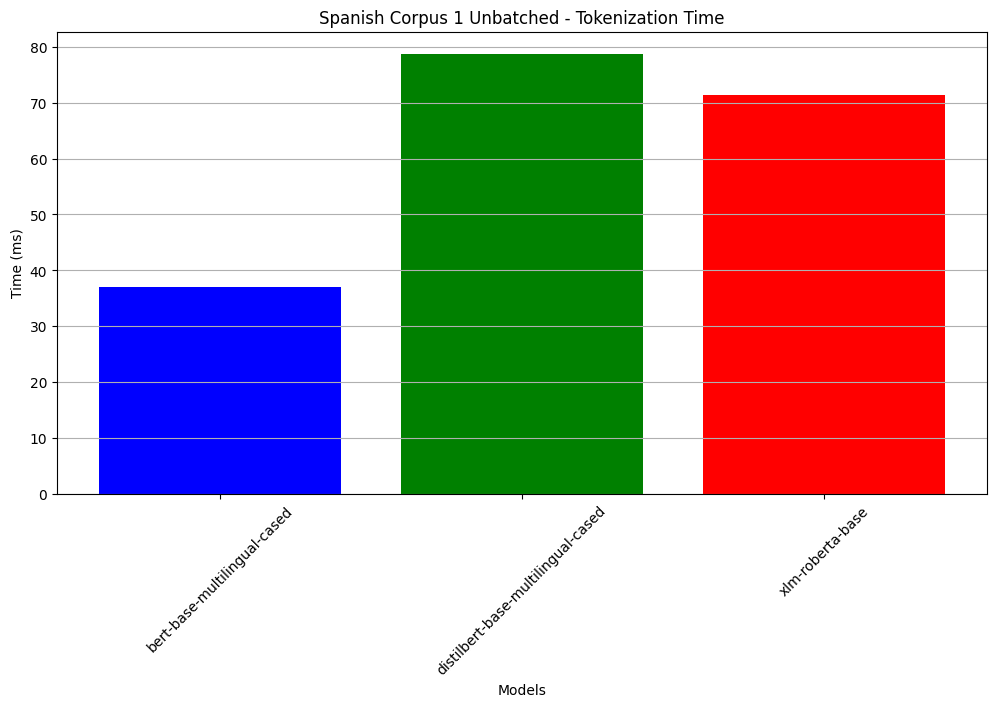

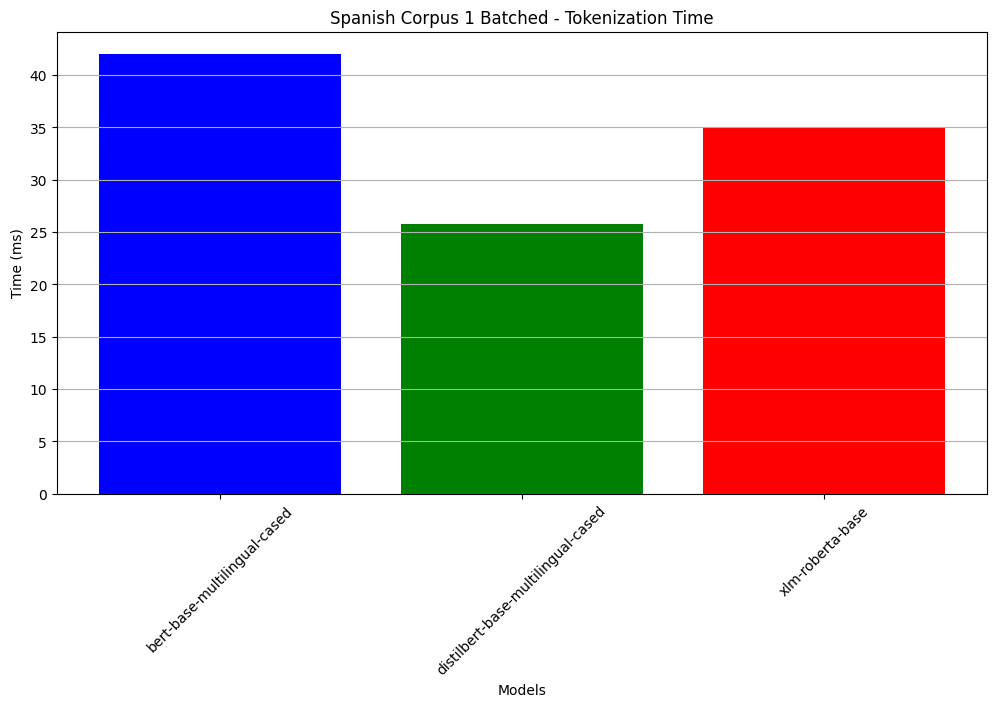

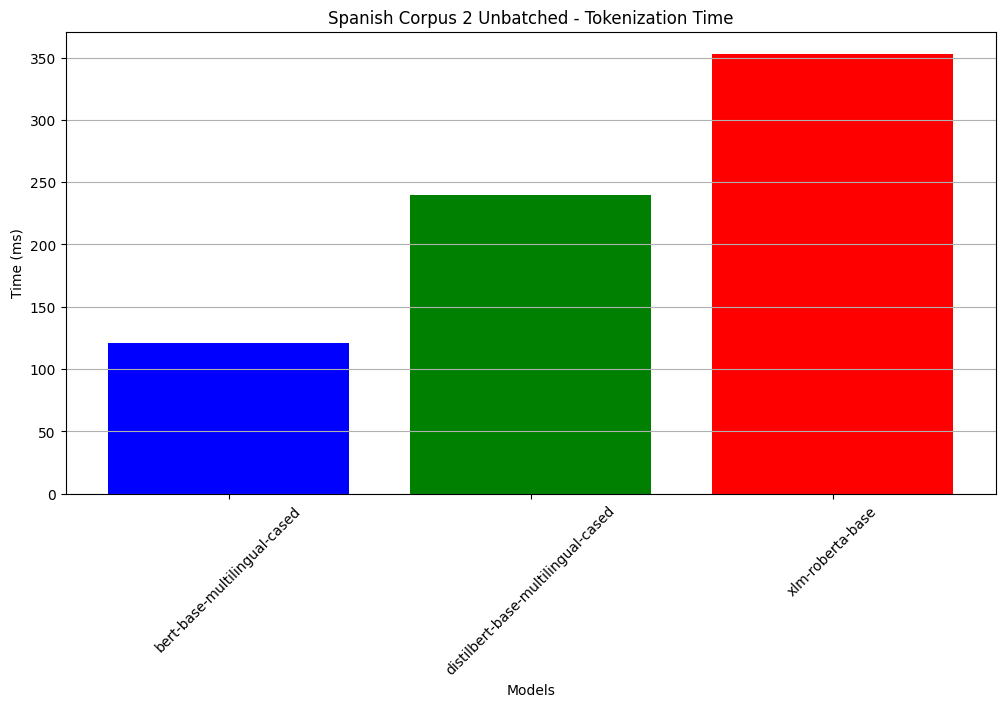

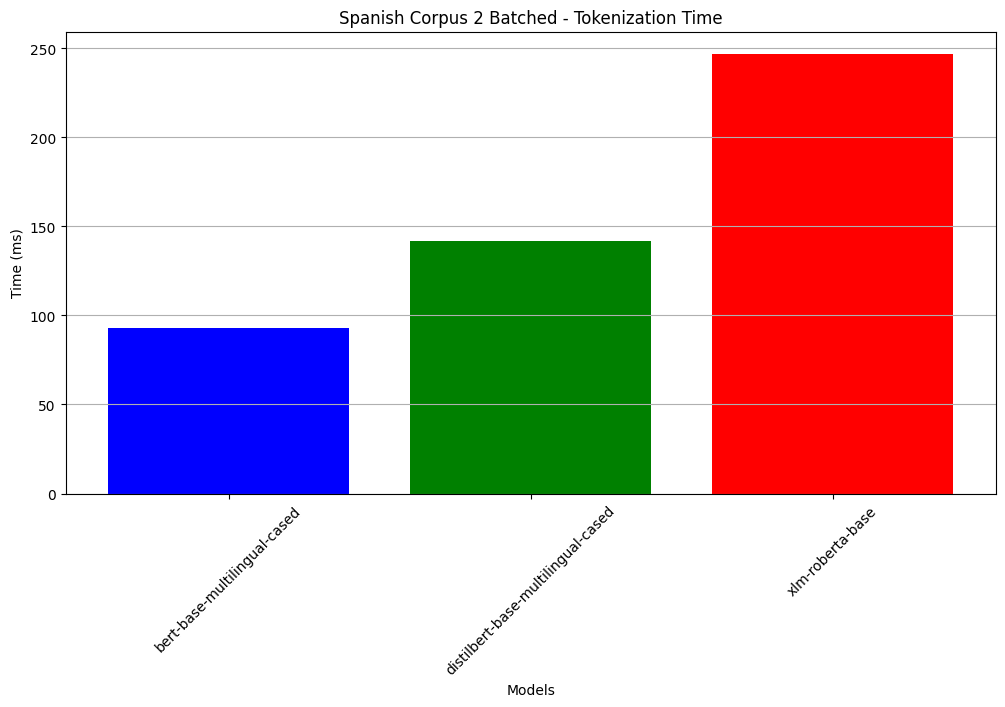

In [ ]:
import matplotlib.pyplot as plt

# Define colors for the bars
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA500', '#00FF00', '#800080', '#FF00FF', '#008080', '#FFFF00', '#808080', '#800000', '#FF0000']

# Define the data and labels (same as before)
data = [
    byte_pair_timing_unbatched,
    byte_pair_timing_batched,
    word_piece_timing_unbatched,
    word_piece_timing_batched,
    unigram_timing_unbatched,
    unigram_timing_batched,
    chinese_corpus1_timing_unbatched,
    chinese_corpus1_timing_batched,
    chinese_corpus2_timing_unbatched,
    chinese_corpus2_timing_batched,
    spanish_corpus1_timing_unbatched,
    spanish_corpus1_timing_batched,
    spanish_corpus2_timing_unbatched,
    spanish_corpus2_timing_batched
]

labels = [
    'Byte Pair Unbatched',
    'Byte Pair Batched',
    'Word Piece Unbatched',
    'Word Piece Batched',
    'Unigram Unbatched',
    'Unigram Batched',
    'Chinese Corpus 1 Unbatched',
    'Chinese Corpus 1 Batched',
    'Chinese Corpus 2 Unbatched',
    'Chinese Corpus 2 Batched',
    'Spanish Corpus 1 Unbatched',
    'Spanish Corpus 1 Batched',
    'Spanish Corpus 2 Unbatched',
    'Spanish Corpus 2 Batched'
]

# Create bar graphs with colors
for i in range(len(data)):
    plt.figure(figsize=(12, 6))
    plt.title(f"{labels[i]} - Tokenization Time")
    plt.xlabel('Models')
    plt.ylabel('Time (ms)')

    methods = []
    tokenization_times = []

    for method, times in data[i].items():
        if method == 'method':
            continue
        methods.append(method)
        tokenization_time = times.get('Tokenization', 0.0)
        tokenization_times.append(tokenization_time)

    plt.bar(methods, tokenization_times, color=colors)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()


# Spacy tokenization

In [52]:
import spacy
import time
import numpy as np

def spacy_unbatched_tokenization(language, corpus, num_runs) -> dict:
  tokenization_times = []
  results = {}
  results['method'] = "Unbatched"
  for i in range(num_runs):
    nlp = spacy.load(language)
    start_time = time.time()
    for text in corpus:
        doc = nlp(text)

    end_time = time.time()
    elapsed_time = (end_time - start_time) * 1e3
    tokenization_times.append(elapsed_time)
  results["SpaCy"] = {"Tokenization Time ": sum(tokenization_times) / num_runs}
  return results

def spacy_batched_tokenization(language, corpus, num_runs) -> dict:
  tokenization_times = []
  results = {}
  results['method'] = "Batched"
  for i in range(num_runs):
    nlp = spacy.load(language)
    start_time = time.time()
    docs = list(nlp.pipe(corpus, batch_size=32))
    end_time = time.time()
    elapsed_time = (end_time - start_time) * 1e3
    tokenization_times.append(elapsed_time)
  results["SpaCy"] = {"Tokenization Time ": sum(tokenization_times) / num_runs}
  return results

print("-----------UNBATCHED TOKENIZATION-----------")
unbatched_tokenize_results_EN1 = spacy_unbatched_tokenization("en_core_web_sm", corpus, 10)
print("Corpus 1 EN Average:", unbatched_tokenize_results_EN1["SpaCy"], " ms")
print("-----------BATCHED TOKENIZATION-----------")
batched_tokenize_time_EN1 = spacy_batched_tokenization("en_core_web_sm", corpus, 10)
print("Corpus 1 EN Average:", batched_tokenize_time_EN1["SpaCy"], " ms")
print("-----------UNBATCHED TOKENIZATION-----------")
unbatched_tokenize_results_EN2 = spacy_unbatched_tokenization("en_core_web_sm", corpus2, 10)
print("Corpus 2 EN Average:", unbatched_tokenize_results_EN2["SpaCy"], " ms")
print("-----------BATCHED TOKENIZATION-----------")
batched_tokenize_time_EN2 = spacy_batched_tokenization("en_core_web_sm", corpus2, 10)
print("Corpus 2 EN Average:", batched_tokenize_time_EN2["SpaCy"], " ms")

print("-----------UNBATCHED ZH 1 TOKENIZATION-----------")
unbatched_tokenize_results_ZH1 = spacy_unbatched_tokenization("zh_core_web_sm", zh1_array, 10)
print("Corpus 1 ZH Average:", unbatched_tokenize_results_ZH1["SpaCy"], " ms")
print("-----------BATCHED ZH 1 TOKENIZATION-----------")
batched_tokenize_time_ZH1 = spacy_batched_tokenization("zh_core_web_sm", zh1_array, 10)
print("Corpus 1 ZH Average:", batched_tokenize_time_ZH1["SpaCy"], " ms")
print("-----------UNBATCHED ZH 2 TOKENIZATION-----------")
unbatched_tokenize_results_ZH2 = spacy_unbatched_tokenization("zh_core_web_sm", zh2_array, 10)
print("Corpus 2 ZH Average:", unbatched_tokenize_results_ZH2["SpaCy"], " ms")
print("-----------BATCHED ZH 2 TOKENIZATION-----------")
batched_tokenize_time_ZH2 = spacy_batched_tokenization("zh_core_web_sm", zh2_array, 10)
print("Corpus 2 ZH Average:", batched_tokenize_time_ZH2["SpaCy"], " ms")

print("-----------UNBATCHED ES 1 TOKENIZATION-----------")
unbatched_tokenize_results_ES1 = spacy_unbatched_tokenization("es_core_news_sm", es1_array, 10)
print("Corpus 1 ES Average:", unbatched_tokenize_results_ES1["SpaCy"], " ms")
print("-----------BATCHED ES 1 TOKENIZATION-----------")
batched_tokenize_time_ES1 = spacy_batched_tokenization("es_core_news_sm", es1_array, 10)
print("Corpus 1 ES Average:", batched_tokenize_time_ES1["SpaCy"], " ms")
print("-----------UNBATCHED ES 2 TOKENIZATION-----------")
unbatched_tokenize_results_ES2 = spacy_unbatched_tokenization("es_core_news_sm", es2_array, 10)
print("Corpus 2 ES Average:", unbatched_tokenize_results_ES2["SpaCy"], " ms")
print("-----------BATCHED ES 2 TOKENIZATION-----------")
batched_tokenize_time_ES2 = spacy_batched_tokenization("es_core_news_sm", es2_array, 10)
print("Corpus 1 ES Average:", batched_tokenize_time_ES2["SpaCy"], " ms")

-----------UNBATCHED TOKENIZATION-----------


KeyboardInterrupt: 